In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Configure display options for pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

In [3]:
# Set plot style
sns.set_style("whitegrid")

## Task 1: The Dataset
- Loading and Familiarizing with the Data
- Are there any interesting things that stand out?

In [4]:
# Defining the path to dataset
file_path = 'ml-engineer-dataset.csv'


In [5]:
try:
    df = pd.read_csv(file_path)
    print(f"Dataset loaded successfully from: {file_path}")
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found! Please put it in the correct directory.")
    exit()

Dataset loaded successfully from: ml-engineer-dataset.csv


In [6]:
# Initial Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43847 entries, 0 to 43846
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   contract-delivery        43847 non-null  object 
 1   demand-forecast          43847 non-null  float64
 2   temperature-normal       43847 non-null  float64
 3   temperature-forecast     43847 non-null  float64
 4   solar-forecast           43847 non-null  float64
 5   day-ahead-auction-price  43847 non-null  float64
 6   wind-forecast            43847 non-null  float64
 7   day-ahead-auction-time   43847 non-null  object 
dtypes: float64(6), object(2)
memory usage: 2.7+ MB


* Thoughts:
    - Only two columns are found to be of object (string) datatype --> `contract-delivery` and `day-ahead-auction-time`
    - No missing values, i.e., non-null. No need for imputation.

In [7]:
# First 5 rows
print(df.head())

           contract-delivery  demand-forecast  temperature-normal  temperature-forecast  solar-forecast  day-ahead-auction-price  wind-forecast     day-ahead-auction-time
0  2020-01-01 00:00:00+00:00         43471.50            1.317628                   0.6             0.0                    38.60        7019.50  2019-12-31 11:00:00+00:00
1  2020-01-01 01:00:00+00:00         42555.50            1.285980                   0.3             0.0                    36.55        7407.00  2019-12-31 11:00:00+00:00
2  2020-01-01 02:00:00+00:00         42448.25            1.224420                  -0.1             0.0                    32.32        7540.50  2019-12-31 11:00:00+00:00
3  2020-01-01 03:00:00+00:00         42567.75            1.169376                  -0.4             0.0                    30.85        7802.75  2019-12-31 11:00:00+00:00
4  2020-01-01 04:00:00+00:00         42209.00            1.101194                  -0.7             0.0                    30.14        7805.75  

In [8]:
# Last 10 rows:")
print(df.tail(10))

               contract-delivery  demand-forecast  temperature-normal  temperature-forecast  solar-forecast  day-ahead-auction-price  wind-forecast     day-ahead-auction-time
43837  2024-12-31 13:00:00+00:00         55859.00            3.590067                   2.8          6948.0                    76.84       24589.50  2024-12-30 11:00:00+00:00
43838  2024-12-31 14:00:00+00:00         54947.50            3.293482                   2.1          2520.5                    82.07       27248.50  2024-12-30 11:00:00+00:00
43839  2024-12-31 15:00:00+00:00         54901.75            2.769080                   1.3           123.5                    83.67       29551.25  2024-12-30 11:00:00+00:00
43840  2024-12-31 16:00:00+00:00         56314.00            2.488333                   0.9             2.5                    83.25       30399.00  2024-12-30 11:00:00+00:00
43841  2024-12-31 17:00:00+00:00         56915.00            2.249007                   0.9             1.5                  

* Thoughts:
    - 'contract-delivery' progresses hourly
    - while 'day-ahead-auction-time' updates daily for 24 new contracts (single contract per hour).

In [9]:
# Statistics
print(df.describe())

       demand-forecast  temperature-normal  temperature-forecast  solar-forecast  day-ahead-auction-price  wind-forecast
count     43847.000000        43847.000000          43847.000000    43847.000000             43847.000000   43847.000000
mean      54168.834658           10.027417             11.171371     6110.825530               107.447477   14793.633972
std        9232.674783            6.724638              7.429299     9450.017605               105.707266   10952.121262
min       30544.750000           -0.119118            -11.200000        0.000000              -500.000000      46.500000
25%       46634.625000            3.528642              5.400000        1.500000                41.350000    5880.000000
50%       54049.250000            9.707157             10.600000      188.250000                81.740000   11889.750000
75%       61762.125000           15.601056             16.800000     9680.125000               129.705000   21702.500000
max       77585.750000          

* Thoughts:
    - row 'min' has negative values. Looks like high renewable penetration.
    - happens where supply (especially renewables) exceeds demand, and generators might pay to offload electricity to avoid grid instability.
    - row 'max' high price spikes: 2325 Eur 
    - Model must be able to predict these values and outliers.

In [10]:
# Incorrect data types --> Data Type Conversion
# `contract-delivery` and `day-ahead-auction-time` are strings. They should ideally be ´datetime` objects.
df['contract-delivery'] = pd.to_datetime(df['contract-delivery'])
df['day-ahead-auction-time'] = pd.to_datetime(df['day-ahead-auction-time'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43847 entries, 0 to 43846
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   contract-delivery        43847 non-null  datetime64[ns, UTC]
 1   demand-forecast          43847 non-null  float64            
 2   temperature-normal       43847 non-null  float64            
 3   temperature-forecast     43847 non-null  float64            
 4   solar-forecast           43847 non-null  float64            
 5   day-ahead-auction-price  43847 non-null  float64            
 6   wind-forecast            43847 non-null  float64            
 7   day-ahead-auction-time   43847 non-null  datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](2), float64(6)
memory usage: 2.7 MB


In [11]:
# Sorting and Unique Identifiers
# Mulitple rows with same 'day-ahead-auction-time' found. So, sorting this group further by 'contract-delivery'
# ensuring no data leak while training 
# info available before the auction time must be used for prediction 

df = df.sort_values(by=['day-ahead-auction-time', 'contract-delivery']).reset_index(drop=True)

In [12]:
# Check for uniqueness of 'contract-delivery' as a row identifier
if df['contract-delivery'].is_unique:
    print("Well-informed: Unique event for each row is identified.")
else:
    print("Event is NOT unique or found an issue.")

Well-informed: Unique event for each row is identified.


In [13]:
# Check for duplicates across all columns
if df.duplicated().any():
    print(f"Duplicate rows found! Number of duplicate rows: {df.duplicated().sum()}")
    df.drop_duplicates(inplace=True)
    print("Duplicate rows removed.")
else:
    print("No duplicate rows found.")

No duplicate rows found.


In [14]:
# Missing values analysis
print(df.isnull().sum())

contract-delivery          0
demand-forecast            0
temperature-normal         0
temperature-forecast       0
solar-forecast             0
day-ahead-auction-price    0
wind-forecast              0
day-ahead-auction-time     0
dtype: int64


In [15]:
# Relationship b/n contract-delivery & day-ahead-auction-time
df['time_difference'] = (df['contract-delivery'] - df['day-ahead-auction-time']).dt.total_seconds() / 3600
print("\n'time_difference' (hours between auction and delivery) Description:")
print(df['time_difference'].describe())


'time_difference' (hours between auction and delivery) Description:
count    43847.000000
mean        23.500376
std          6.922324
min         12.000000
25%         18.000000
50%         24.000000
75%         29.500000
max         36.000000
Name: time_difference, dtype: float64


* Thoughts:
    - This is the day-ahead auction market structure
    - Shortest lag/'min' difference = 12 hours (00:00 delivery, auction at 12:00 previous day)
    - Longest lag/'max' difference = 36 hours


In [16]:
# Assuming provided timestamps are in UTC.
# CET is UTC+1 during standard time, UTC+2 during daylight saving.

# Let's re-calculate time differences based on UTC delivery and auction times.
# The calculation `df['contract-delivery'] - df['day-ahead-auction-time']` correctly gives the timedelta.


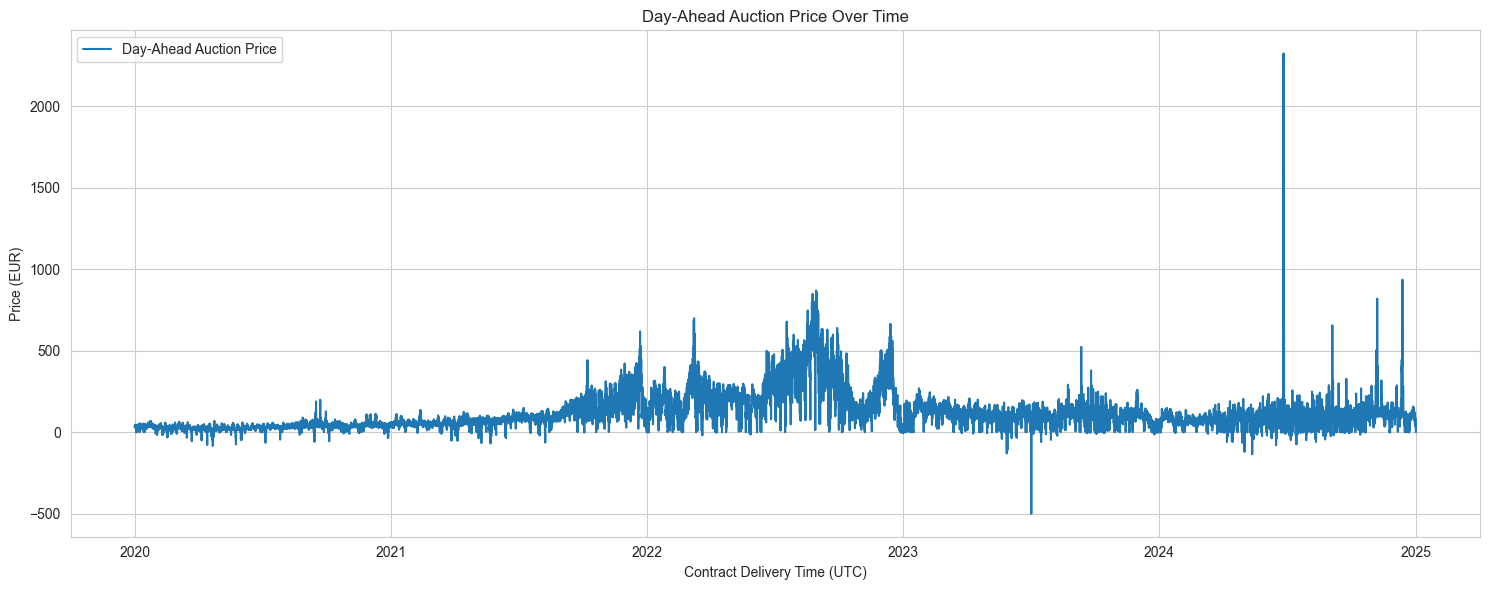

In [17]:
# Visualisation Key data Distributions and Time Series Patterns

# Day-Ahead Auction Price Over Time
plt.figure(figsize=(15, 6))
plt.plot(df['contract-delivery'], df['day-ahead-auction-price'], label='Day-Ahead Auction Price')
plt.title('Day-Ahead Auction Price Over Time')
plt.xlabel('Contract Delivery Time (UTC)')
plt.ylabel('Price (EUR)')
plt.legend()
plt.tight_layout()
plt.show()

* Thoughts:
    - spikes and negative prices were visible. High demand & low supply vice-versa.
    - high volatile & have non linear relations 

Text(0, 0.5, 'Frequency')

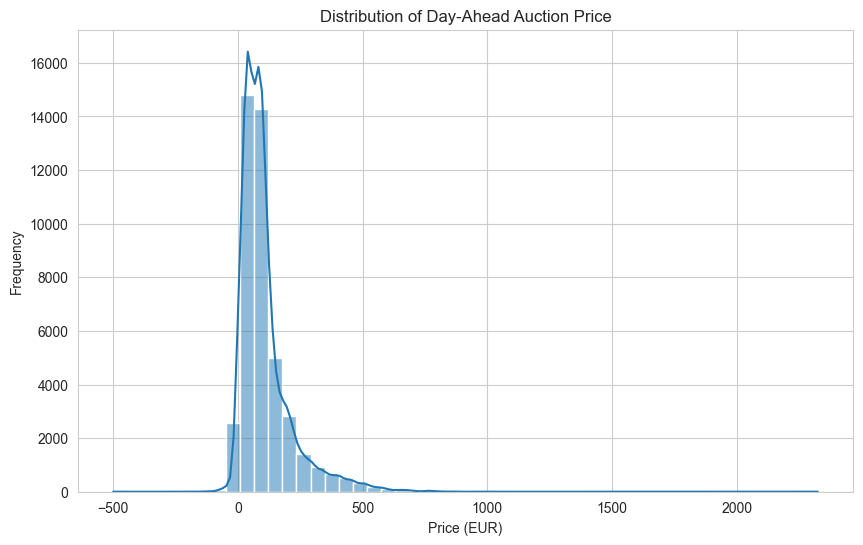

In [18]:
# Day-Ahead Auction Price Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['day-ahead-auction-price'], bins=50, kde=True)
plt.title('Distribution of Day-Ahead Auction Price')
plt.xlabel('Price (EUR)')
plt.ylabel('Frequency')

* Thoughts:
    - distribution is highly right-skewed

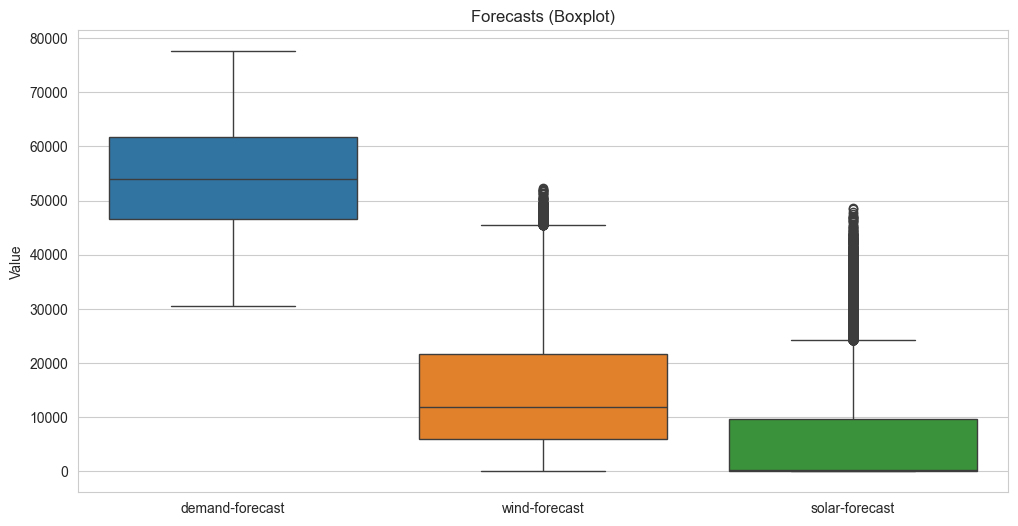

In [19]:
# Forecasts Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['demand-forecast', 'wind-forecast', 'solar-forecast']])
plt.title("Forecasts (Boxplot)")
plt.ylabel("Value")
plt.show()

Text(0, 0.5, 'Frequency')

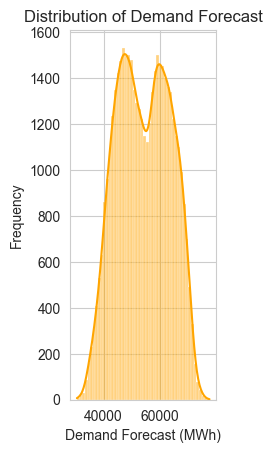

In [20]:
# Demand Forecast Distribution

plt.subplot(1, 3, 2)
sns.histplot(df['demand-forecast'], bins=50, kde=True, color='orange')
plt.title('Distribution of Demand Forecast')
plt.xlabel('Demand Forecast (MWh)')
plt.ylabel('Frequency')

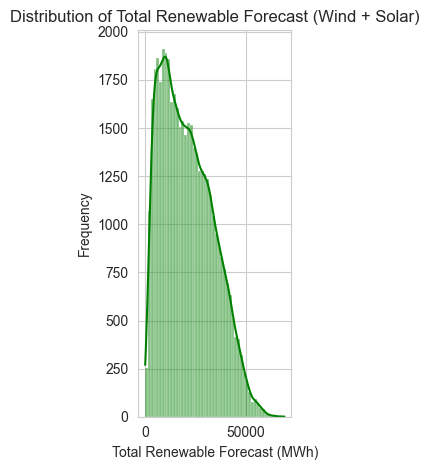

In [21]:
# Total Renewable Forecast

plt.subplot(1, 3, 3)
sns.histplot(df['wind-forecast'] + df['solar-forecast'], bins=50, kde=True, color='green')
plt.title('Distribution of Total Renewable Forecast (Wind + Solar)')
plt.xlabel('Total Renewable Forecast (MWh)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

* Thoughts:
    - distribution is right-skewed

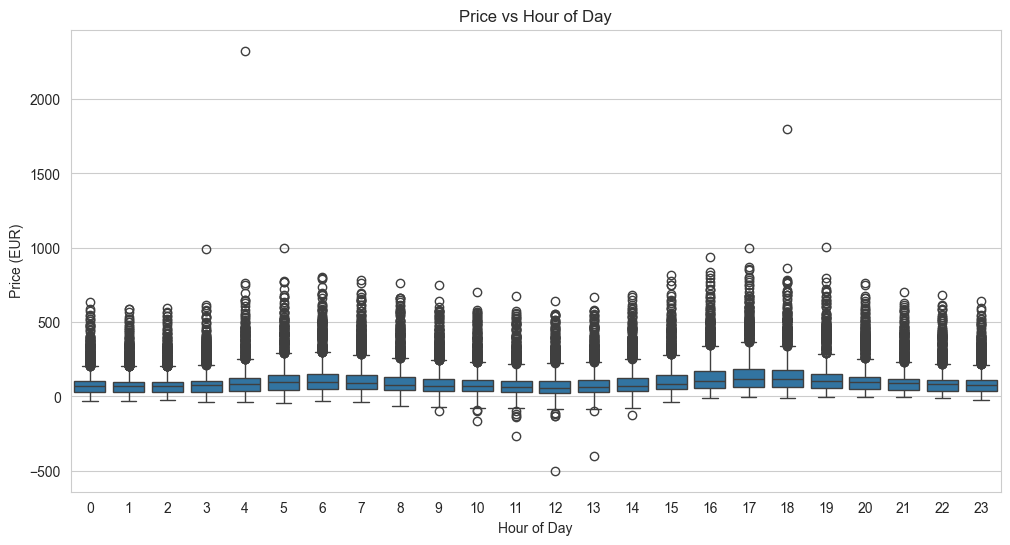

In [22]:
# Price vs Hour of Day
df['hour'] = df['contract-delivery'].dt.hour
plt.figure(figsize=(12, 6))
sns.boxplot(x='hour', y='day-ahead-auction-price', data=df)
plt.title("Price vs Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Price (EUR)")
plt.show()

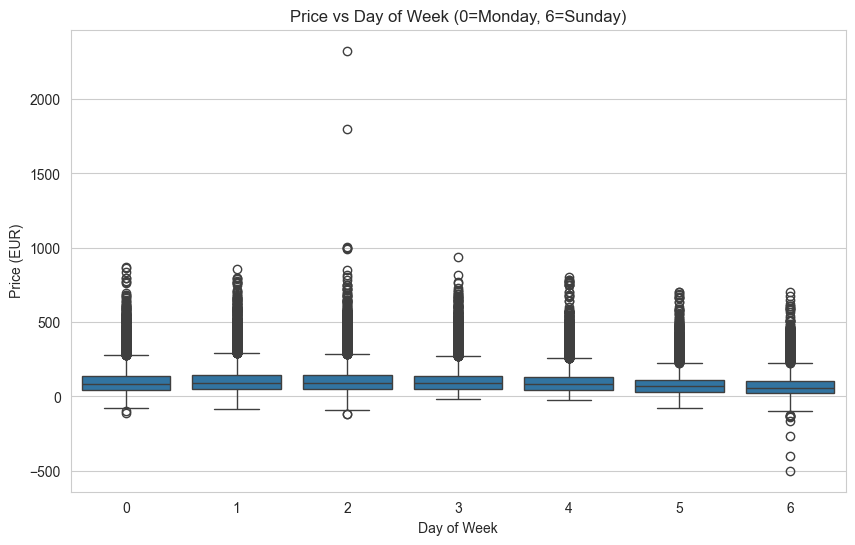

In [23]:
# Price vs Day of Week
df['weekday'] = df['contract-delivery'].dt.dayofweek # 0 = Monday
plt.figure(figsize=(10, 6))
sns.boxplot(x='weekday', y='day-ahead-auction-price', data=df)
plt.title("Price vs Day of Week (0=Monday, 6=Sunday)")
plt.xlabel("Day of Week")
plt.ylabel("Price (EUR)")
plt.show()

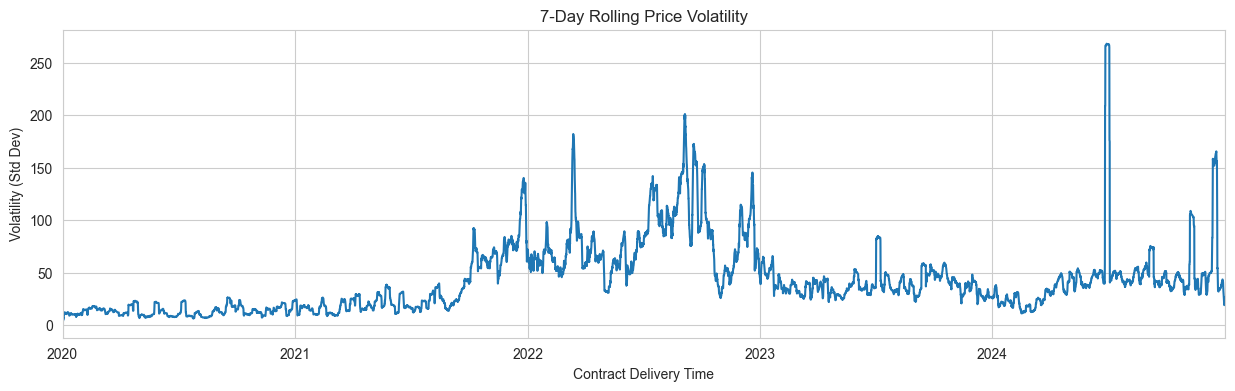

In [24]:
# Rolling Volatility
df['rolling_volatility'] = df['day-ahead-auction-price'].rolling(window=24*7, min_periods=1).std()
plt.figure(figsize=(15, 4))
df.set_index('contract-delivery')['rolling_volatility'].plot(title='7-Day Rolling Price Volatility');
plt.ylabel("Volatility (Std Dev)")
plt.xlabel("Contract Delivery Time")
plt.show()

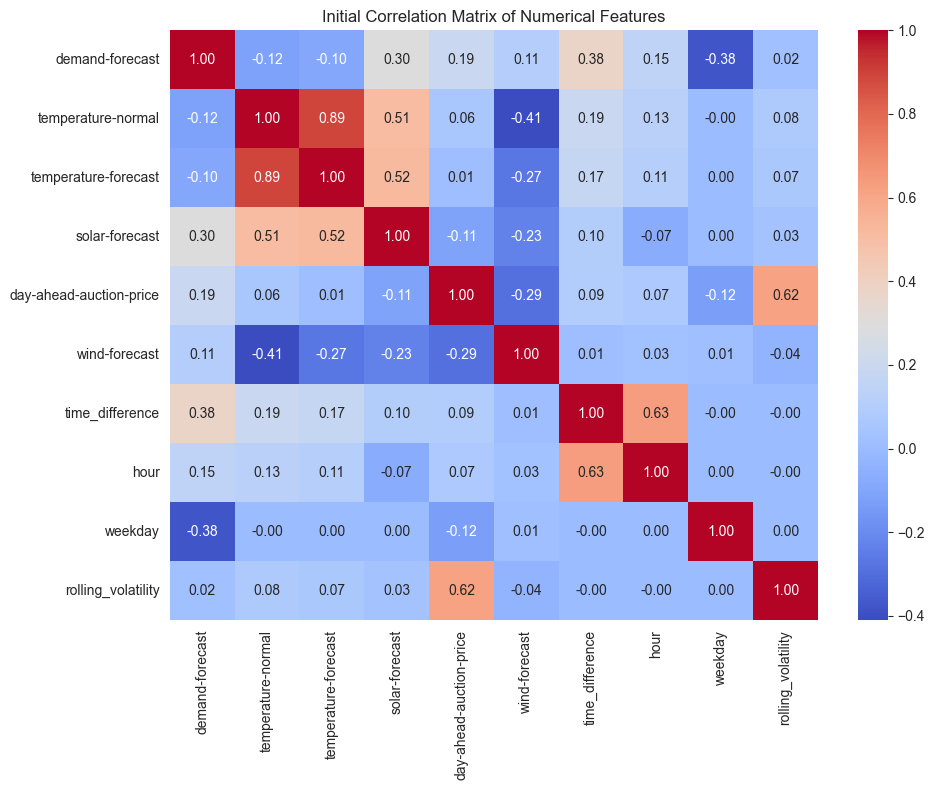

                         demand-forecast  temperature-normal  temperature-forecast  solar-forecast  day-ahead-auction-price  wind-forecast  time_difference      hour   weekday  rolling_volatility
demand-forecast                 1.000000           -0.115556             -0.095990        0.299509                 0.194064       0.107392         0.375831  0.150119 -0.377939            0.020280
temperature-normal             -0.115556            1.000000              0.892352        0.513392                 0.058104      -0.410359         0.191741  0.125640 -0.000029            0.078272
temperature-forecast           -0.095990            0.892352              1.000000        0.520240                 0.012175      -0.268210         0.174584  0.108050  0.001465            0.068317
solar-forecast                  0.299509            0.513392              0.520240        1.000000                -0.108085      -0.231720         0.100589 -0.069525  0.000906            0.034635
day-ahead-auction-pr

In [25]:
# Correlation Matrix during this phase
numerical_cols = df.select_dtypes(include=np.number).columns
corr_matrix = df[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Initial Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()
print(corr_matrix)

* Thoughts:
    - auction price has a positive correlation with demand forecase (0.19)
    - -- > higher the demand higher the prices
    - auction price has a negative correl with wind (-0.29) & solar (-0.11) forecast
    - -- > solar is available only during daylight time, hence weaker correl
    - temp-normal +ive correl with solar forecast (0.51)
    - -- > more sun during warmer periods
    - wind forecase has -ve correl with temp-normal (-0.41) & temp forecast (-0.27)
    - -- > may be due to season. colder time means low normal temp and are windier

In [26]:
# for linear models
#-- > we might not need both temp-normal & temp-forecast, bcz they have high correl

## Task 2: Building a Baseline Model
- we'll use temporal features & direct forecasts.

In [27]:
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import time

In [28]:
# Ensuring df is the original, full DataFrame with 'hour' and 'weekday' from Task 1 EDA
if 'hour' not in df.columns:
    df['hour'] = df['contract-delivery'].dt.hour
if 'weekday' not in df.columns:
    df['weekday'] = df['contract-delivery'].dt.dayofweek # Monday=0
if 'month' not in df.columns:
    df['month'] = df['contract-delivery'].dt.month

In [29]:
# Feature Engineering for Baseline
df['temperature_diff'] = df['temperature-forecast'] - df['temperature-normal']

In [30]:
# In a day-ahead auction, all 24 hourly prices for the NEXT day are released SIMULTANEOUSLY at 12:00 CET.
# Therefore, any lagged feature must only use prices from previous delivery days' auctions.
# cannot use info from same delivery day's outcome
# that would not be known at auction time. preventing 'peeking into the future'/data leakage.


# Create a copy of the df for lagging operations to ensure original index is preserved
# Sort by 'contract-delivery' to ensure chronological order within groups.

df_for_lags = df.sort_values(by='contract-delivery').copy()


In [31]:
# lag_24_price: Price for same hour, 1 day prior.
# using 'Group by' 'hour' to ensure we get correct previous day's value for that specific hour.
# `shift(24)` shifts by 24 rows within that group.
df['lag_24_price'] = df_for_lags.groupby('hour')['day-ahead-auction-price'].shift(24).reindex(df.index)

In [32]:
# lag_168_price: Price for same hour, 7 days prior --> same hour, same day of week, last week.
df['lag_168_price'] = df_for_lags.groupby('hour')['day-ahead-auction-price'].shift(168).reindex(df.index)

In [33]:
# prev_day_avg_price --> Avg price of entire previous delivery day.
# For that, we need daily average prices from actual data.
daily_avg_price_calc = df_for_lags.groupby(df_for_lags['contract-delivery'].dt.date)['day-ahead-auction-price'].mean().reset_index()
daily_avg_price_calc.rename(columns={'contract-delivery': 'delivery_date', 'day-ahead-auction-price': 'daily_avg_price'}, inplace=True)

# Then, previous day's average.
daily_avg_price_calc['prev_day_avg_price_calc'] = daily_avg_price_calc['daily_avg_price'].shift(1)

# Merging this back to main DF based on delivery date.
df['delivery_date'] = df['contract-delivery'].dt.date # temp delivery_date column in main df
df = pd.merge(df, daily_avg_price_calc[['delivery_date', 'prev_day_avg_price_calc']], on='delivery_date', how='left')
df.drop('delivery_date', axis=1, inplace=True) # Clean up temp column

In [34]:
# Baseline Feature Engineering
# we'll use 'contract-delivery' to extract 'hour of day' and 'day of week'
df['hour_of_day'] = df['contract-delivery'].dt.hour
df['day_of_week'] = df['contract-delivery'].dt.dayofweek # Monday=0

In [35]:
# Defining features for baseline model.
# using direct forecasts, time, lag, and time features.

baseline_features = [
    'hour', 'weekday', 'month', # Time features
    'demand-forecast', 'wind-forecast', 'solar-forecast', # Direct forecasts
    'temperature-forecast', 'temperature-normal', 'temperature_diff', # Temp features
    'lag_24_price', 'lag_168_price', 'prev_day_avg_price_calc' # Corrected lag features
]
target = 'day-ahead-auction-price'

X = df[baseline_features]
y = df[target]

print(f"Baseline features are: {baseline_features}")

Baseline features are: ['hour', 'weekday', 'month', 'demand-forecast', 'wind-forecast', 'solar-forecast', 'temperature-forecast', 'temperature-normal', 'temperature_diff', 'lag_24_price', 'lag_168_price', 'prev_day_avg_price_calc']


In [36]:
print(X.head(5))

   hour  weekday  month  demand-forecast  wind-forecast  solar-forecast  temperature-forecast  temperature-normal  temperature_diff  lag_24_price  lag_168_price  prev_day_avg_price_calc
0     0        2      1         43471.50        7019.50             0.0                   0.6            1.317628         -0.717628           NaN            NaN                      NaN
1     1        2      1         42555.50        7407.00             0.0                   0.3            1.285980         -0.985980           NaN            NaN                      NaN
2     2        2      1         42448.25        7540.50             0.0                  -0.1            1.224420         -1.324420           NaN            NaN                      NaN
3     3        2      1         42567.75        7802.75             0.0                  -0.4            1.169376         -1.569376           NaN            NaN                      NaN
4     4        2      1         42209.00        7805.75             0.

In [37]:
# Dropping NaNs rows introduced by corrected lag features
initial_rows_before_lag_drop = len(df)
df_cleaned_baseline = df.dropna(subset=baseline_features + [target]).copy()
print(f"Dropped {initial_rows_before_lag_drop - len(df_cleaned_baseline)} rows due to NaN values from corrected lag features (first 7 days).")
print(f"DataFrame after feature engineering and dropping NaNs: {len(df_cleaned_baseline)} records.")

Dropped 4032 rows due to NaN values from corrected lag features (first 7 days).
DataFrame after feature engineering and dropping NaNs: 39815 records.


In [38]:
# Data Splitting (Fixed-Split 80/20 based on date)
df_cleaned_baseline.sort_values('contract-delivery', inplace=True) # Ensure chronological order
split_date = df_cleaned_baseline['contract-delivery'].quantile(0.8) # 80% for training, 20% for testing

train_data = df_cleaned_baseline[df_cleaned_baseline['contract-delivery'] <= split_date].copy()
test_data = df_cleaned_baseline[df_cleaned_baseline['contract-delivery'] > split_date].copy()

X_train_baseline = train_data[baseline_features]
y_train_baseline = train_data[target]
X_test_baseline = test_data[baseline_features]
y_test_baseline = test_data[target]

print(f"Train set size: {len(train_data)} records, up to {train_data['contract-delivery'].max()}")
print(f"Test set size: {len(test_data)} records, from {test_data['contract-delivery'].min()}")

Train set size: 31852 records, up to 2024-02-04 03:00:00+00:00
Test set size: 7963 records, from 2024-02-04 04:00:00+00:00


In [39]:
# Simple Models (Mean Predictor & Linear Regression)

# evaluation function
def evaluate_model_metrics(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name}: MAE: {mae:.2f} | RMSE: {rmse:.2f} | R2: {r2:.2f}")
    return mae, rmse, r2

In [40]:
# Baseline 1: Mean Predictor
price_mean = y_train_baseline.mean()
test_data['pred_baseline_mean'] = price_mean
mae_mean, rmse_mean, r2_mean = evaluate_model_metrics(y_test_baseline, test_data['pred_baseline_mean'], "Mean Baseline")

Mean Baseline: MAE: 57.08 | RMSE: 80.67 | R2: -0.45


In [41]:
# Baseline 2: Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_baseline, y_train_baseline)
test_data['pred_lr'] = lr_model.predict(X_test_baseline)
print("Linear Regression model trained.")
mae_lr, rmse_lr, r2_lr = evaluate_model_metrics(y_test_baseline, test_data['pred_lr'], "Linear Regression")

Linear Regression model trained.
Linear Regression: MAE: 25.98 | RMSE: 55.48 | R2: 0.32


In [42]:
import sklearn
print(sklearn.__version__)
print(sklearn.__file__)

1.7.0
d:\Machine_learning\Projects\Terra_one_challenge\ML_Challenge_TerraOne\.venv\Lib\site-packages\sklearn\__init__.py


* Thoughts:
    - Baseline 1: Mean Predictor
    - MAE: 57.08 EUR. Avg error is very high; model is far from actual prices.
    - RMSE: 80.67 EUR. Significantly higher than MAE, confirming presence of very large errors.
    - R2: -0.45. A negative R2 means this model performs worse than simply predicting mean of test data.
    - Essentially, it's a very poor baseline, often due to significant data shifts or high variance.

    - Baseline 2: Linear Regression
    - MAE: 25.98 EUR. improvement over Mean Predictor, indicating it captures some trends.
    - RMSE: 55.48 EUR. Still substantially higher than MAE, suggesting this model also makes significant large errors/outliers (likely missing price spikes).
    - R2: 0.32. Positive but low R2, implying model explains only 32% of variance in day-ahead auction prices.
    - This confirms simple linear relationships are insufficient for complex power price dynamics.

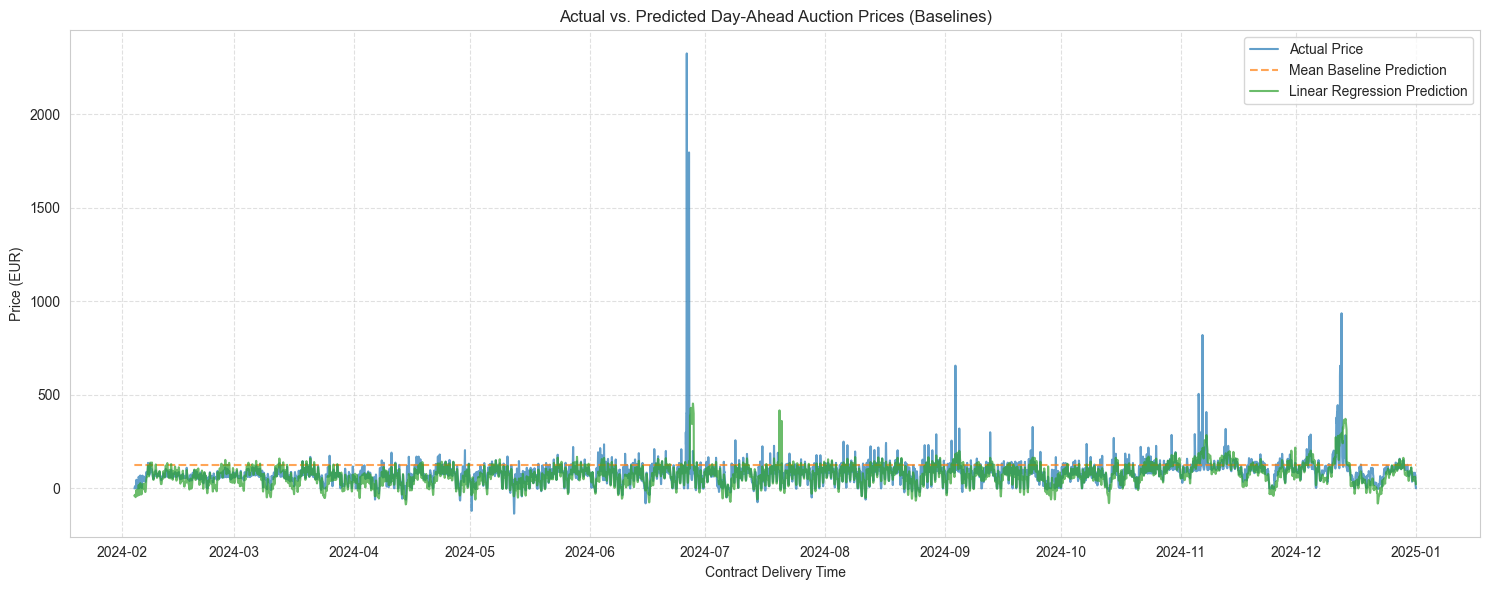

In [43]:
# Time Series Plot Insights (Actual vs. Predicted Day-Ahead Auction Prices - Baselines)
plt.figure(figsize=(15, 6))
plt.plot(test_data['contract-delivery'], test_data[target], label='Actual Price', alpha=0.7)
plt.plot(test_data['contract-delivery'], test_data['pred_baseline_mean'], label='Mean Baseline Prediction', alpha=0.7, linestyle='--')
plt.plot(test_data['contract-delivery'], test_data['pred_lr'], label='Linear Regression Prediction', alpha=0.7)
plt.title('Actual vs. Predicted Day-Ahead Auction Prices (Baselines)')
plt.xlabel('Contract Delivery Time')
plt.ylabel('Price (EUR)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

* Thoughts:
    - Mean Baseline is a flat line, showing no ability to track price changes.
    - Linear Regression predictions are much smoother and less volatile than actual prices.
    - Both baselines severely miss all significant price spikes and deep dips.
    - The models are clearly underfitting price volatility and extreme events.
    - --> need for advanced features and models capable of capturing non-linear and extreme price behaviors.

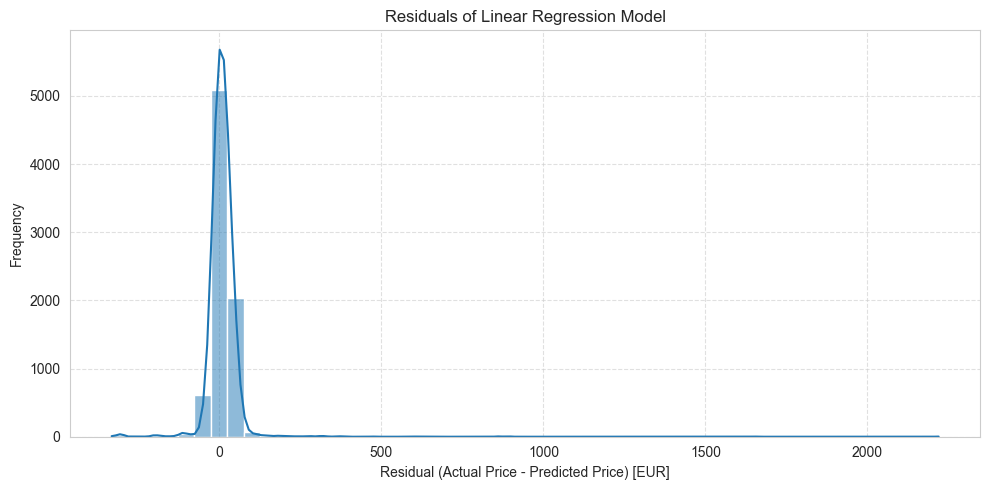

In [44]:
# Residual Plot for Linear Regression
test_data['residual_lr'] = y_test_baseline - test_data['pred_lr']
plt.figure(figsize=(10, 5))
sns.histplot(test_data['residual_lr'], kde=True, bins=50)
plt.title("Residuals of Linear Regression Model")
plt.xlabel("Residual (Actual Price - Predicted Price) [EUR]")
plt.ylabel("Frequency")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

* Thoughts:
    - Heavily right-skewed, with a tall peak near zero and a long tail extending into positive values.
    - Positive residuals (actual > predicted) are frequent and large in magnitude.
    - --> Model frequently under-predicts the actual price.

Text(0, 0.5, 'Residuals (EUR)')

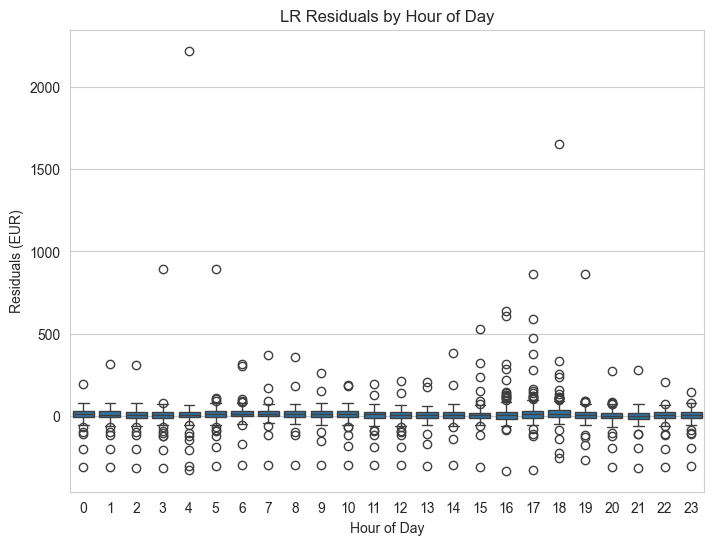

In [45]:
# Residuals Analysis by Time (Hour of Day)
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x=test_data['contract-delivery'].dt.hour, y=test_data['residual_lr'])
plt.title('LR Residuals by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Residuals (EUR)')

* Thoughts:
    - Median residual is near zero for most hours.
    - However, the spread of residuals varies significantly by hour.
    - Hours like 4-5 AM (low demand) and 16-19 PM (evening peak) show larger positive outliers and greater variance.
    - --> The baseline model doesn't fully capture the complex, non-linear influence of hourly patterns on residuals.

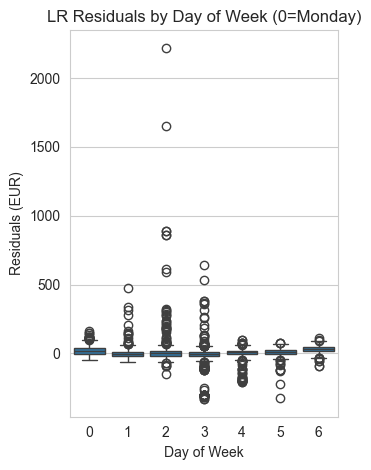

In [46]:
# Residuals Analysis by Day of Week
plt.subplot(1, 2, 2)
sns.boxplot(x=test_data['contract-delivery'].dt.dayofweek, y=test_data['residual_lr'])
plt.title('LR Residuals by Day of Week (0=Monday)')
plt.xlabel('Day of Week')
plt.ylabel('Residuals (EUR)')
plt.tight_layout()
plt.show()

* Thoughts:
    - Median residual is generally around zero for all days.
    - However, weekdays (especially Monday-Thursday: 0-3) show a larger spread of residuals and more significant positive outliers compared to weekends (5-6).
    - --> Suggests LR baseline model has more trouble with weekday market dynamics.
    - --> Confirms baseline features are inadequate for capturing nuanced temporal effects by day of week.

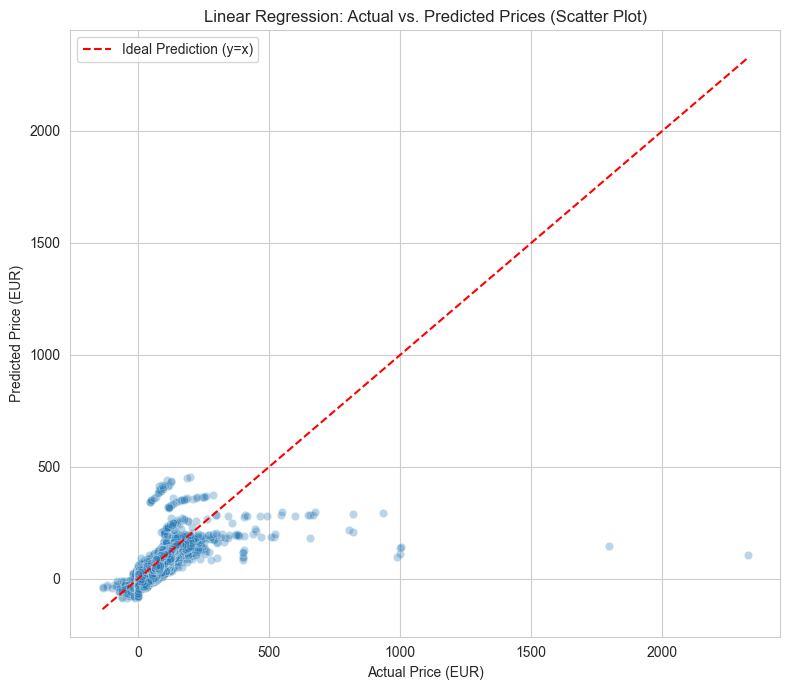

In [47]:
# Scatter Plot: Actual vs. Predicted (Linear Regression)
plt.figure(figsize=(8, 7))
sns.scatterplot(x=y_test_baseline, y=test_data['pred_lr'], alpha=0.3)
plt.plot([y_test_baseline.min(), y_test_baseline.max()], [y_test_baseline.min(), y_test_baseline.max()], 'r--', label='Ideal Prediction (y=x)')
plt.title('Linear Regression: Actual vs. Predicted Prices (Scatter Plot)')
plt.xlabel('Actual Price (EUR)')
plt.ylabel('Predicted Price (EUR)')
plt.legend()
plt.tight_layout()
plt.show()

* Thoughts:
    - Most predictions cluster tightly at low actual prices, near y=x line.
    - For high actual prices, there's a strong downward bias: predicted prices are much lower than actual.
    - Struggles with negative prices.
    - --> need for non-linear model and features that drive predictions towards extreme values.

## Task 3: Improving Upon the Baseline (Initial Attempt)
- Random forest, LightGBM, XGboost
- using TimeSeriesSplit rather than Single, fixed test Set

In [48]:
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
from xgboost import XGBRegressor

In [49]:
# inheriting features from previous steps (like # df already contain corrected lags and prev_day_avg_price_calc from Task 2)
df_advanced = df.copy()

In [50]:
# Advanced Feature Engineering

# checking initial time features are present in df_advanced
if 'hour' not in df_advanced.columns:
    df_advanced['hour'] = df_advanced['contract-delivery'].dt.hour
if 'weekday' not in df_advanced.columns:
    df_advanced['weekday'] = df_advanced['contract-delivery'].dt.dayofweek
if 'month' not in df_advanced.columns:
    df_advanced['month'] = df_advanced['contract-delivery'].dt.month
if 'year' not in df_advanced.columns: # Add year explicitly if not already there
    df_advanced['year'] = df_advanced['contract-delivery'].dt.year

# check & Add temperature_diff for direct use
if 'temperature_diff' not in df_advanced.columns:
    df_advanced['temperature_diff'] = df_advanced['temperature-forecast'] - df_advanced['temperature-normal']

# Cyclical Features for 'Hour of Day' and 'Day of Week' (up to 2 pairs)
for i in range(1, 3):
    df_advanced[f'hour_sin_{i}'] = np.sin(2 * np.pi * i * df_advanced['hour'] / 24)
    df_advanced[f'hour_cos_{i}'] = np.cos(2 * np.pi * i * df_advanced['hour'] / 24)
    df_advanced[f'day_of_week_sin_{i}'] = np.sin(2 * np.pi * i * df_advanced['weekday'] / 7)
    df_advanced[f'day_of_week_cos_{i}'] = np.cos(2 * np.pi * i * df_advanced['weekday'] / 7)

# Derived Features
df_advanced['net_demand_forecast'] = df_advanced['demand-forecast'] - (df_advanced['wind-forecast'] + df_advanced['solar-forecast'])
df_advanced['renewable_forecast_total'] = df_advanced['wind-forecast'] + df_advanced['solar-forecast']

In [51]:
# checking lag-related feature is correct and available, price_volatility_24h_lag.
# Adding volatility feature, ensuring it uses correct lagged price column
# ensuring consistent indexing for rolling by resort
df_advanced_for_volatility_calc = df_advanced.sort_values(by='contract-delivery').copy()
df_advanced['price_volatility_24h_lag'] = df_advanced_for_volatility_calc.groupby('hour')['lag_24_price'].transform(lambda x: x.rolling(window=24, min_periods=1).std()).reindex(df_advanced.index)
# df_advanced['price_volatility_24h_lag'].fillna(0, inplace=True) # Fill initial NaNs from rolling with 0
df_advanced['price_volatility_24h_lag'] = df_advanced['price_volatility_24h_lag'].fillna(0)

In [52]:
# Feature Set for Advanced Models
advanced_features_attempt1 = [
    'hour', 'weekday', 'month', 'year',
    'demand-forecast', 'wind-forecast', 'solar-forecast',
    'temperature-forecast', 'temperature-normal', 'temperature_diff',
    'hour_sin_1', 'hour_cos_1', 'day_of_week_sin_1', 'day_of_week_cos_1',
    'hour_sin_2', 'hour_cos_2', 'day_of_week_sin_2', 'day_of_week_cos_2',
    'net_demand_forecast', 'renewable_forecast_total',
    'lag_24_price', 'lag_168_price', 'prev_day_avg_price_calc', # These MUST exist from Task 2
    'price_volatility_24h_lag' # Newly created in Task 3
]
target = 'day-ahead-auction-price'

In [53]:
# Initial NaN Handling: using Dropna
# lags generated in Task 2 and filled with NaNs at start -->such rows will be dropped here.
initial_rows_before_dropna = len(df_advanced)
df_advanced_cleaned = df_advanced.dropna(subset=advanced_features_attempt1 + [target]).copy()
print(f"Dropped {initial_rows_before_dropna - len(df_advanced_cleaned)} rows due to NaNs from feature engineering (using dropna).")
print(f"DataFrame for advanced models: {len(df_advanced_cleaned)} records.")

X_advanced_attempt1 = df_advanced_cleaned[advanced_features_attempt1]
y_advanced_attempt1 = df_advanced_cleaned[target]
print(f"Features selected for Initial Advanced Models: {advanced_features_attempt1}")

Dropped 4032 rows due to NaNs from feature engineering (using dropna).
DataFrame for advanced models: 39815 records.
Features selected for Initial Advanced Models: ['hour', 'weekday', 'month', 'year', 'demand-forecast', 'wind-forecast', 'solar-forecast', 'temperature-forecast', 'temperature-normal', 'temperature_diff', 'hour_sin_1', 'hour_cos_1', 'day_of_week_sin_1', 'day_of_week_cos_1', 'hour_sin_2', 'hour_cos_2', 'day_of_week_sin_2', 'day_of_week_cos_2', 'net_demand_forecast', 'renewable_forecast_total', 'lag_24_price', 'lag_168_price', 'prev_day_avg_price_calc', 'price_volatility_24h_lag']


* Thoughts:
    - Feature Expansion: generated enhanced temporal (cyclical) and volatility features.
    - Causality (Lagged Features): Relies on pre-calculated features from task 2 --> lag_24_price, lag_168_price, prev_day_avg_price_calc. 

In [54]:
# Data Splitting (TimeSeriesSplit)
tscv_standard = TimeSeriesSplit(n_splits=5)# creates cross validation object
print(f"Using standard TimeSeriesSplit with n_splits={tscv_standard.n_splits}.")

Using standard TimeSeriesSplit with n_splits=5.


In [55]:
# Building Initial Advanced Models & Evaluation

models_attempt1 = {
    "Random Forest (Attempt 1)": RandomForestRegressor(random_state=42, n_estimators=500, max_depth=10, n_jobs=-1),
    "LightGBM (Attempt 1)": lgb.LGBMRegressor(random_state=42, n_estimators=1000, learning_rate=0.05, num_leaves=63, n_jobs=-1)
}

results_attempt1 = {}
last_fold_plot_data_attempt1 = {}
actual_prices_last_fold_attempt1 = None
contract_delivery_last_fold_attempt1 = None

for model_name, model in models_attempt1.items():
    print(f"\n--- Training and Evaluating {model_name} ---")
    fold_maes = []
    fold_rmses = []
    fold_r2s = []
    fold_train_times = []
    fold_predict_times = []

    # Re-initialize model for each cross-validation run
    if "Random Forest" in model_name:
        current_model = RandomForestRegressor(random_state=42, n_estimators=500, max_depth=10, n_jobs=-1)
    else: # LightGBM
        current_model = lgb.LGBMRegressor(random_state=42, n_estimators=1000, learning_rate=0.05, num_leaves=63, n_jobs=-1)

    for fold, (train_index, test_index) in enumerate(tscv_standard.split(X_advanced_attempt1)):
        print(f"  Fold {fold+1}/{tscv_standard.n_splits}")
        X_train_fold, X_test_fold = X_advanced_attempt1.iloc[train_index], X_advanced_attempt1.iloc[test_index]
        y_train_fold, y_test_fold = y_advanced_attempt1.iloc[train_index], y_advanced_attempt1.iloc[test_index]

        start_time = time.time()
        current_model.fit(X_train_fold, y_train_fold) # Training the model on current fold's training data 
        train_time = time.time() - start_time
        fold_train_times.append(train_time)

        start_time = time.time()
        y_pred_fold = current_model.predict(X_test_fold)# makes predictions on its test data 
        predict_time = time.time() - start_time
        fold_predict_times.append(predict_time)

        # evaluation model metrics using helper function
        mae, rmse, r2 = evaluate_model_metrics(y_test_fold, y_pred_fold, f"{model_name} - Fold {fold+1}")
        fold_maes.append(mae)
        fold_rmses.append(rmse)
        fold_r2s.append(r2)

        # Storing predictions for last fold
        if fold == tscv_standard.n_splits - 1:
            last_fold_plot_data_attempt1[model_name] = y_pred_fold
            actual_prices_last_fold_attempt1 = y_test_fold
            contract_delivery_last_fold_attempt1 = df_advanced_cleaned.iloc[test_index]['contract-delivery']

    avg_mae = np.mean(fold_maes)
    avg_rmse = np.mean(fold_rmses)
    avg_r2 = np.mean(fold_r2s)
    avg_train_time = np.mean(fold_train_times)
    avg_predict_time = np.mean(fold_predict_times)

    results_attempt1[model_name] = { # storing in results_attempt1
        'MAE': avg_mae,
        'RMSE': avg_rmse,
        'R2': avg_r2,
        'Train Time (s)': avg_train_time,
        'Predict Time (s)': avg_predict_time
    }
    print(f"\n{model_name} Average Performance across {tscv_standard.n_splits} folds:")
    print(f"  MAE: {avg_mae:.2f} EUR")
    print(f"  RMSE: {avg_rmse:.2f} EUR")
    print(f"  R2: {avg_r2:.2f}")
    print(f"  Avg Train Time: {avg_train_time:.2f} s")
    print(f"  Avg Predict Time: {avg_predict_time:.2f} s")


--- Training and Evaluating Random Forest (Attempt 1) ---
  Fold 1/5
Random Forest (Attempt 1) - Fold 1: MAE: 62.29 | RMSE: 89.13 | R2: -0.41
  Fold 2/5
Random Forest (Attempt 1) - Fold 2: MAE: 120.11 | RMSE: 166.55 | R2: -0.30
  Fold 3/5
Random Forest (Attempt 1) - Fold 3: MAE: 53.18 | RMSE: 65.10 | R2: 0.54
  Fold 4/5
Random Forest (Attempt 1) - Fold 4: MAE: 20.20 | RMSE: 28.89 | R2: 0.56
  Fold 5/5
Random Forest (Attempt 1) - Fold 5: MAE: 23.33 | RMSE: 57.71 | R2: 0.36

Random Forest (Attempt 1) Average Performance across 5 folds:
  MAE: 55.82 EUR
  RMSE: 81.48 EUR
  R2: 0.15
  Avg Train Time: 25.58 s
  Avg Predict Time: 0.26 s

--- Training and Evaluating LightGBM (Attempt 1) ---
  Fold 1/5
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001744 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3207
[LightGBM] [Info] Number of data points in the train set: 6640, number of used features: 24
[LightG

* Thoughts:
    - Employed Random Forest and LightGBM as initial advanced models.
    - Cross-Validation: Evaluated performance using standard TimeSeriesSplit (5 folds).
    - Performance Metrics: Captured MAE, RMSE, R2, and computational times for each model and fold.

In [56]:
# Comparing Initial Advanced Models Against Baselines

# Re-define baseline metrics (from Task 2) for direct comparison in one table
# Note: These are from fixed-split Task 2 baseline
baseline_comparison_metrics = pd.DataFrame({
    'Model': ['Mean Baseline', 'Linear Regression', 'Random Forest (Attempt 1)', 'LightGBM (Attempt 1)'],
    'MAE': [mae_mean, mae_lr, results_attempt1["Random Forest (Attempt 1)"]['MAE'], results_attempt1["LightGBM (Attempt 1)"]['MAE']],
    'RMSE': [rmse_mean, rmse_lr, results_attempt1["Random Forest (Attempt 1)"]['RMSE'], results_attempt1["LightGBM (Attempt 1)"]['RMSE']],
    'R2': [r2_mean, r2_lr, results_attempt1["Random Forest (Attempt 1)"]['R2'], results_attempt1["LightGBM (Attempt 1)"]['R2']]
})

print(baseline_comparison_metrics.round(2).to_string(index=False))

                    Model   MAE  RMSE    R2
            Mean Baseline 57.08 80.67 -0.45
        Linear Regression 25.98 55.48  0.32
Random Forest (Attempt 1) 55.82 81.48  0.15
     LightGBM (Attempt 1) 56.55 81.94  0.15


* Thoughts:
    - Key Finding: This comparison has shown worse performance for advanced models in this initial attempt
    - indicating evaluation issues, not model inadequacy.
    - Problems include:
        - small early training folds
        - simple NaN handling using `dropna`
            * can remove a significant portion of early data
            * leads to data scarcity problem for initial 'TimeSeriesSplit' folds
        - Lack of Robust TimeSeriesSplit Configuration, doesn't include:
            * `gap` (time buffer between train/test) or guarantee a `min_train_size` (a minimum training history is needed)
        - no hyperparameter tuning
    - Solutions:
    - These issues will be addressed by the refinements in 'attempt2/phase2.
        - impute NaNs using ffill within groups & then a global mean/zero for initial values
        --> provides richer history for model training
        - will use `min_train_size` (e.g., 1 year of data) to ensure sufficient training history in all folds, and introduce a `gap` (e.g., 1 day).
        - will add more advanced interaction features
        --> `renewable_penetration`, `temperature_deviation_sq`
        - evaluate all models using same, refined TimeSeriesSplit for a fair comparison
        - Model Explainability (SHAP) & Uncertainty (Quantile Forecasting)

##### Optimized Model & Evaluation

In [57]:
# Optimized Feature Engineering with Robust NaN Imputation

# function to encapsulate all feature creation and robust NaN handling
def create_features_optimized(df_input):
    df_processed = df_input.copy()

    # Basic Time and Derived Features (from previous attempts)
    if 'hour' not in df_processed.columns:
        df_processed['hour'] = df_processed['contract-delivery'].dt.hour
    if 'weekday' not in df_processed.columns:
        df_processed['weekday'] = df_processed['contract-delivery'].dt.dayofweek
    if 'month' not in df_processed.columns:
        df_processed['month'] = df_processed['contract-delivery'].dt.month
    if 'year' not in df_processed.columns:
        df_processed['year'] = df_processed['contract-delivery'].dt.year
    
    df_processed['temperature_diff'] = df_processed['temperature-forecast'] - df_processed['temperature-normal']
    df_processed['net_demand_forecast'] = df_processed['demand-forecast'] - (df_processed['wind-forecast'] + df_processed['solar-forecast'])
    df_processed['renewable_forecast_total'] = df_processed['wind-forecast'] + df_processed['solar-forecast']

    # New Features for Optimization
    # this ratio f´gives insight into how much of demand is expected to be met by intermittent renewables.
    df_processed['renewable_penetration'] = df_processed['renewable_forecast_total'] / (df_processed['demand-forecast'] + 1e-6) # 1e-6 to avoid division by zero
    # Captures non-linear impacts of large temp deviations (e.g., both very hot and very cold temps)
    # have an equally large, but opposite, effect on demand and thus price.
    df_processed['temperature_deviation_sq'] = df_processed['temperature_diff']**2

    # Expanding Fourier series for cyclical features (3 pairs) to capture finer temporal details.
    for i in range(1, 3):
        df_processed[f'hour_sin_{i}'] = np.sin(2 * np.pi * i * df_processed['hour'] / 24)
        df_processed[f'hour_cos_{i}'] = np.cos(2 * np.pi * i * df_processed['hour'] / 24)
        df_processed[f'day_of_week_sin_{i}'] = np.sin(2 * np.pi * i * df_processed['weekday'] / 7)
        df_processed[f'day_of_week_cos_{i}'] = np.cos(2 * np.pi * i * df_processed['weekday'] / 7)

    # Creating 'delivery_date' on df_processed directly for daily calculations and merges.
    df_processed['delivery_date'] = df_processed['contract-delivery'].dt.date 

    # df_temp_for_lags_calc, a temporary DF used for sorting and grouping for lags.
    df_temp_sorted_for_lags = df_processed.sort_values(by='contract-delivery').copy()

    # Price Lags: Previous day's (24h) and previous week's (168h) prices for the same hour.
    # Grouping by 'hour' ensures the shift is applied within each hour bucket.
    df_processed['lag_24_price'] = df_temp_sorted_for_lags.groupby('hour')['day-ahead-auction-price'].shift(24).reindex(df_processed.index)
    df_processed['lag_168_price'] = df_temp_sorted_for_lags.groupby('hour')['day-ahead-auction-price'].shift(168).reindex(df_processed.index)

    # Previous Day Average Price:
    # This calculation should happen irrespective of whether it existed previously or not.
    daily_avg_price_calc_for_merge = df_temp_sorted_for_lags.groupby('delivery_date')['day-ahead-auction-price'].mean().reset_index()
    daily_avg_price_calc_for_merge.rename(columns={'day-ahead-auction-price': 'daily_avg_price'}, inplace=True)
    daily_avg_price_calc_for_merge['prev_day_avg_price_calc'] = daily_avg_price_calc_for_merge['daily_avg_price'].shift(1)

    # If 'prev_day_avg_price_calc' already exists from an earlier run
    # drop it from df_processed before merging newly calculated one.
    if 'prev_day_avg_price_calc' in df_processed.columns:
        df_processed.drop('prev_day_avg_price_calc', axis=1, inplace=True)
   
    # Merge prev_day_avg_price_calc back to df_processed (main DF)
    # This merge now correctly uses 'delivery_date' from df_processed.
    df_processed = pd.merge(df_processed, daily_avg_price_calc_for_merge[['delivery_date', 'prev_day_avg_price_calc']], 
                            left_on='delivery_date', right_on='delivery_date', how='left')
    
    # Volatility Feature: Rolling standard deviation of past 24 `lag_24_price` values.
    # using `df_processed` after lags are merged
    df_processed['price_volatility_24h_lag'] = df_processed.groupby('hour')['lag_24_price'].transform(lambda x: x.rolling(window=24, min_periods=1).std())


    # Imputation Strategy for all features that can have NaNs
    # Lagged features introduce NaNs at beginning of the series
    # Instead of dropping these valuable rows, we impute them to retain maximum data for training.
    
    # List of all lagged columns that are expected to have NaNs.
    cols_to_impute = [
        'lag_24_price', 'lag_168_price', 'prev_day_avg_price_calc', 'price_volatility_24h_lag'
    ]
    # Filtering columns that are guaranteed to exist at this point in df_processed
    existing_cols_to_impute = [col for col in cols_to_impute if col in df_processed.columns]
    
    # Log the number of NaNs before imputation for transparency.
    nans_before_imputation = df_processed[existing_cols_to_impute].isnull().sum().sum()
    print(f"NaNs before imputation in key lagged/volatility features: {nans_before_imputation}")

    # ffill within each hour group for lags, then fill remaining initial NaNs.
    for col in existing_cols_to_impute:
        df_processed[col] = df_processed.groupby('hour')[col].ffill() 
        df_processed[col].fillna(0, inplace=True) # Fill any remaining initial NaNs with 0

    # Drop temporary column
    df_processed.drop('delivery_date', axis=1, inplace=True)

    # Re-sort before splitting/model training outside function --> for consistent order
    df_processed.sort_values('contract-delivery', inplace=True, ignore_index=True)

    return df_processed

In [58]:
# Execution of Optimized Feature Engineering
# Taking fresh copy of df from Task 1 (which only has original columns & original features)
df_optimized = create_features_optimized(df.copy()) 

print(f"\nOptimized DataFrame shape after feature engineering and robust NaN handling: {len(df_optimized)} records.")

NaNs before imputation in key lagged/volatility features: 5232

Optimized DataFrame shape after feature engineering and robust NaN handling: 43847 records.


C:\Users\ranji\AppData\Local\Temp\ipykernel_8724\4106214013.py:85: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_processed[col].fillna(0, inplace=True) # Fill any remaining initial NaNs with 0


In [59]:
print("First 5 rows of Optimized DataFrame with new features:")
print(df_optimized.head())

First 5 rows of Optimized DataFrame with new features:
          contract-delivery  demand-forecast  temperature-normal  temperature-forecast  solar-forecast  day-ahead-auction-price  wind-forecast    day-ahead-auction-time  time_difference  hour  weekday  rolling_volatility  month  temperature_diff  lag_24_price  lag_168_price  hour_of_day  day_of_week  year  net_demand_forecast  renewable_forecast_total  renewable_penetration  temperature_deviation_sq  hour_sin_1  hour_cos_1  day_of_week_sin_1  day_of_week_cos_1  hour_sin_2    hour_cos_2  day_of_week_sin_2  day_of_week_cos_2  prev_day_avg_price_calc  price_volatility_24h_lag
0 2020-01-01 00:00:00+00:00         43471.50            1.317628                   0.6             0.0                    38.60        7019.50 2019-12-31 11:00:00+00:00             13.0     0        2                 NaN      1         -0.717628           0.0            0.0            0            2  2020             36452.00                   7019.50            

In [60]:
print("\nMissing values in Optimized DataFrame (should be 0 for all used features):")
# all expected features to check for NaNs
all_expected_optimized_features = [
    'hour', 'weekday', 'month', 'year', 'temperature_diff',
    'net_demand_forecast', 'renewable_forecast_total', 'renewable_penetration', 'temperature_deviation_sq',
    'hour_sin_1', 'hour_cos_1', 'day_of_week_sin_1', 'day_of_week_cos_1',
    'hour_sin_2', 'hour_cos_2', 'day_of_week_sin_2', 'day_of_week_cos_2',
    'lag_24_price', 'lag_168_price', 'prev_day_avg_price_calc', 'price_volatility_24h_lag'
]
# check columns that actually exist in the DataFrame
existing_features_to_check = [f for f in all_expected_optimized_features if f in df_optimized.columns]
print(df_optimized[existing_features_to_check].isnull().sum().loc[lambda x: x > 0]) # columns with remaining NaNs


Missing values in Optimized DataFrame (should be 0 for all used features):
Series([], dtype: int64)


* Thoughts:
    - entire feature engineering and NaN imputation process is executed via a single, self-contained function call.
    - Confirmed no NaNs remain in the final feature set, imputation strategy validation.

In [61]:
from xgboost import XGBRegressor
import lightgbm as lgb
import shap
from sklearn.model_selection import RandomizedSearchCV

In [62]:
# Optimized Model & Evaluation

# features for the optimized models
# This list must precisely match features produced by create_features_optimized
optimized_features = [
    'hour', 'weekday', 'month', 'year', 'temperature_diff',
    'net_demand_forecast', 'renewable_forecast_total', 'renewable_penetration', 'temperature_deviation_sq',
    'hour_sin_1', 'hour_cos_1', 'day_of_week_sin_1', 'day_of_week_cos_1',
    'hour_sin_2', 'hour_cos_2', 'day_of_week_sin_2', 'day_of_week_cos_2',
    'lag_24_price', 'lag_168_price', 'prev_day_avg_price_calc', 'price_volatility_24h_lag'
]
target = 'day-ahead-auction-price'

# final check to see whether all optimized_features actually exist & have no NaNs 
final_optimized_features = [f for f in optimized_features if f in df_optimized.columns and df_optimized[f].isnull().sum() == 0]
if len(final_optimized_features) != len(optimized_features):
    print("Some intended optimized features are missing or contain NaNs after feature engineering.")
print(f"\nFinal set of optimized features for modeling ({len(final_optimized_features)} features):")
print(final_optimized_features)

X_optimized = df_optimized[final_optimized_features]
y_optimized = df_optimized[target]


Final set of optimized features for modeling (21 features):
['hour', 'weekday', 'month', 'year', 'temperature_diff', 'net_demand_forecast', 'renewable_forecast_total', 'renewable_penetration', 'temperature_deviation_sq', 'hour_sin_1', 'hour_cos_1', 'day_of_week_sin_1', 'day_of_week_cos_1', 'hour_sin_2', 'hour_cos_2', 'day_of_week_sin_2', 'day_of_week_cos_2', 'lag_24_price', 'lag_168_price', 'prev_day_avg_price_calc', 'price_volatility_24h_lag']


In [63]:
# Refined Data Splitting (TimeSeriesSplit with gap)
tscv_refined = TimeSeriesSplit(n_splits=5, gap=24)
print(f"Using refined TimeSeriesSplit: n_splits={tscv_refined.n_splits}, gap={tscv_refined.gap} hours.")

Using refined TimeSeriesSplit: n_splits=5, gap=24 hours.


In [64]:
# Hyperparameter Tuning for XGBoost

# parameter distribution for RandomizedSearchCV
param_dist_xgb = {
    'n_estimators': [500, 750, 1000, 1250, 1500], # No. of boosting rounds (trees)
    'learning_rate': [0.01, 0.02, 0.05, 0.1],
    'max_depth': [5, 7, 10, 12],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'gamma': [0, 0.1, 0.2], # Min loss reduction
    'reg_alpha': [0, 0.1, 0.5], # L1 regularization
    'reg_lambda': [0, 0.1, 0.5] # L2 regularization
}

n_iter_search_xgb = 30 # No.of parameter settings that are sampled
random_search_xgb = RandomizedSearchCV(XGBRegressor(random_state=42, n_jobs=-1, tree_method='hist'), # 'hist' for faster training
                                        param_distributions=param_dist_xgb,
                                        n_iter=n_iter_search_xgb,
                                        scoring='neg_mean_absolute_error', # Optimize for MAE
                                        cv=tscv_refined, # refined TSCV for tuning
                                        verbose=1, # Prints progress
                                        random_state=42,
                                        n_jobs=-1)

print(f"Starting RandomizedSearchCV for XGBoost with {n_iter_search_xgb} iterations on {tscv_refined.n_splits} folds...")
start_time_tuning = time.time()
random_search_xgb.fit(X_optimized, y_optimized)
tuning_time_optimized = time.time() - start_time_tuning
print(f"XGBoost Hyperparameter tuning complete in {tuning_time_optimized:.2f} seconds.")

best_xgb_params = random_search_xgb.best_params_
print(f"Best XGBoost parameters found: {best_xgb_params}")
best_xgb_model = random_search_xgb.best_estimator_

Starting RandomizedSearchCV for XGBoost with 30 iterations on 5 folds...
Fitting 5 folds for each of 30 candidates, totalling 150 fits
XGBoost Hyperparameter tuning complete in 1057.82 seconds.
Best XGBoost parameters found: {'subsample': 0.9, 'reg_lambda': 0, 'reg_alpha': 0.1, 'n_estimators': 1250, 'max_depth': 5, 'learning_rate': 0.02, 'gamma': 0.2, 'colsample_bytree': 0.9}


In [65]:
# Build & Evaluate All Models with Refined TimeSeriesSplit

# This list is specifically for LR to maintain its original "simpler features" concept for fair comparison
# against its own baseline performance, but now within the context of the X_optimized DataFrame.

baseline_features_for_lr_comparison = [
    'hour', 'weekday', 'month', 'temperature_diff', # Base features
    'net_demand_forecast', 'renewable_forecast_total', # Derived from original forecasts
    'lag_24_price', 'lag_168_price', 'prev_day_avg_price_calc' # Corrected lag features
]
# Sanity check: features are actually in X_optimized?
# to prevent runtime errors.
missing_lr_features = [f for f in baseline_features_for_lr_comparison if f not in X_optimized.columns]
if missing_lr_features:
    print(f"WARNING: Linear Regression comparison features missing from X_optimized: {missing_lr_features}. Adjust `baseline_features_for_lr_comparison`.")

In [66]:
# all the models that will be trained and evaluated in CV loop.
models_to_evaluate_optimized = {
    "Mean Baseline": None, # calculates per fold
    "Linear Regression": LinearRegression(), # Will be trained on its simpler feature set
    "Random Forest": RandomForestRegressor(random_state=42, n_estimators=500, max_depth=10, n_jobs=-1), # Consistent RF params
    "XGBoost (Tuned)": best_xgb_model, # tuned XGBoost model
    "LightGBM (Quantile - Median)": lgb.LGBMRegressor(objective='quantile', alpha=0.5, random_state=42, 
                                                     n_estimators=1000, learning_rate=0.05, num_leaves=63, n_jobs=-1) # Representative LGBM for median
}

results_optimized = {} # stores average performance metrics for each model
last_fold_plot_data_optimized = {} # stores predictions of all models from last test fold
actual_prices_last_fold_optimized = None # Stores actual prices of last test fold
contract_delivery_last_fold_optimized = None # Stores delivery times of last test fold
last_train_index = None # Stores indices of last training fold, used for SHAP
last_test_index = None # Stores indices of last test fold, used for SHAP/Quantile plots

In [67]:
# Training and Evaluation (Cross-Validation Loop)
for model_name, model in models_to_evaluate_optimized.items():
    print(f"\n--- Training and Evaluating {model_name} ---")
    fold_maes = []
    fold_rmses = []
    fold_r2s = []
    fold_train_times = [] 
    fold_predict_times = []

    # Re-initialize model for each CV run for clean state
    current_model = model

    for fold, (train_idx, test_idx) in enumerate(tscv_refined.split(X_optimized)):
        # Stores current fold's indices for future use
        last_train_index = train_idx
        last_test_index = test_idx

        # Define specific X_train/test and y_train/test for current fold
        if model_name == "Linear Regression":
            # LR uses only its simpler features
            X_train_fold = X_optimized.iloc[train_idx][baseline_features_for_lr_comparison]
            X_test_fold = X_optimized.iloc[test_idx][baseline_features_for_lr_comparison]
        else: # Random Forest, XGBoost, LightGBM (Quantile) use all optimized features
            X_train_fold = X_optimized.iloc[train_idx]
            X_test_fold = X_optimized.iloc[test_idx]

        y_train_fold = y_optimized.iloc[train_idx]
        y_test_fold = y_optimized.iloc[test_idx]

        # Handle Mean Baseline separately
        if model_name == "Mean Baseline":
            start_time = time.time()
            y_pred_fold = np.full_like(y_test_fold, y_train_fold.mean()) # Predict mean of training fold
            train_time = 0 # No training time for mean baseline
            predict_time = time.time() - start_time
        else:
            start_time = time.time()
            current_model.fit(X_train_fold, y_train_fold)
            train_time = time.time() - start_time

            start_time_pred = time.time()
            y_pred_fold = current_model.predict(X_test_fold)
            predict_time = time.time() - start_time_pred
        
        fold_train_times.append(train_time)
        fold_predict_times.append(predict_time)

        # Evaluate current fold's performance
        mae, rmse, r2 = evaluate_model_metrics(y_test_fold, y_pred_fold, f"{model_name} - Fold {fold+1}")
        fold_maes.append(mae)
        fold_rmses.append(rmse)
        fold_r2s.append(r2)

        # Storing predictions for last fold for detailed comparison plotting
        if fold == tscv_refined.n_splits - 1:
            last_fold_plot_data_optimized[model_name] = y_pred_fold
            actual_prices_last_fold_optimized = y_test_fold
            contract_delivery_last_fold_optimized = df_optimized.iloc[test_idx]['contract-delivery']

    # Calculate average metrics only if folds were run
    # safeguard for edge cases where tscv might yield no folds
    if fold_maes: # Checks if list is not empty
        avg_mae = np.mean(fold_maes)
        avg_rmse = np.mean(fold_rmses)
        avg_r2 = np.mean(fold_r2s)
        avg_train_time = np.mean(fold_train_times)
        avg_predict_time = np.mean(fold_predict_times)
    else:
        avg_mae, avg_rmse, avg_r2, avg_train_time, avg_predict_time = [np.nan]*5 # Assign NaN

    results_optimized[model_name] = {
        'MAE': avg_mae,
        'RMSE': avg_rmse,
        'R2': avg_r2,
        'Train Time (s)': avg_train_time,
        'Predict Time (s)': avg_predict_time
    }
    print(f"\n{model_name} Average Performance across {tscv_refined.n_splits} folds:")
    print(f"  MAE: {avg_mae:.2f} EUR")
    print(f"  RMSE: {avg_rmse:.2f} EUR")
    print(f"  R2: {avg_r2:.2f}")
    print(f"  Avg Train Time: {avg_train_time:.2f} s")
    print(f"  Avg Predict Time: {avg_predict_time:.2f} s")


--- Training and Evaluating Mean Baseline ---
Mean Baseline - Fold 1: MAE: 33.22 | RMSE: 39.50 | R2: -1.24
Mean Baseline - Fold 2: MAE: 138.44 | RMSE: 162.70 | R2: -2.28
Mean Baseline - Fold 3: MAE: 139.70 | RMSE: 201.97 | R2: -0.66
Mean Baseline - Fold 4: MAE: 44.06 | RMSE: 57.01 | R2: -0.71
Mean Baseline - Fold 5: MAE: 47.99 | RMSE: 76.09 | R2: -0.20

Mean Baseline Average Performance across 5 folds:
  MAE: 80.68 EUR
  RMSE: 107.46 EUR
  R2: -1.02
  Avg Train Time: 0.00 s
  Avg Predict Time: 0.00 s

--- Training and Evaluating Linear Regression ---
Linear Regression - Fold 1: MAE: 17.05 | RMSE: 21.42 | R2: 0.34
Linear Regression - Fold 2: MAE: 51.01 | RMSE: 68.06 | R2: 0.43
Linear Regression - Fold 3: MAE: 58.75 | RMSE: 77.13 | R2: 0.76
Linear Regression - Fold 4: MAE: 23.58 | RMSE: 31.63 | R2: 0.47
Linear Regression - Fold 5: MAE: 25.73 | RMSE: 57.52 | R2: 0.32

Linear Regression Average Performance across 5 folds:
  MAE: 35.22 EUR
  RMSE: 51.15 EUR
  R2: 0.46
  Avg Train Time: 0.0

In [68]:
# Final Performance Comparison Table
print("\nFinal Performance Comparison: All Models (averaged over Refined TimeSeriesSplit)")

final_comparison_table_optimized = pd.DataFrame(results_optimized).transpose()
print(final_comparison_table_optimized.round(2).to_string())


Final Performance Comparison: All Models (averaged over Refined TimeSeriesSplit)
                                MAE    RMSE    R2  Train Time (s)  Predict Time (s)
Mean Baseline                 80.68  107.46 -1.02            0.00              0.00
Linear Regression             35.22   51.15  0.46            0.01              0.00
Random Forest                 46.52   64.94  0.10           21.78              0.23
XGBoost (Tuned)               45.50   63.75  0.15            3.76              0.05
LightGBM (Quantile - Median)  44.98   63.28  0.13            4.72              0.18


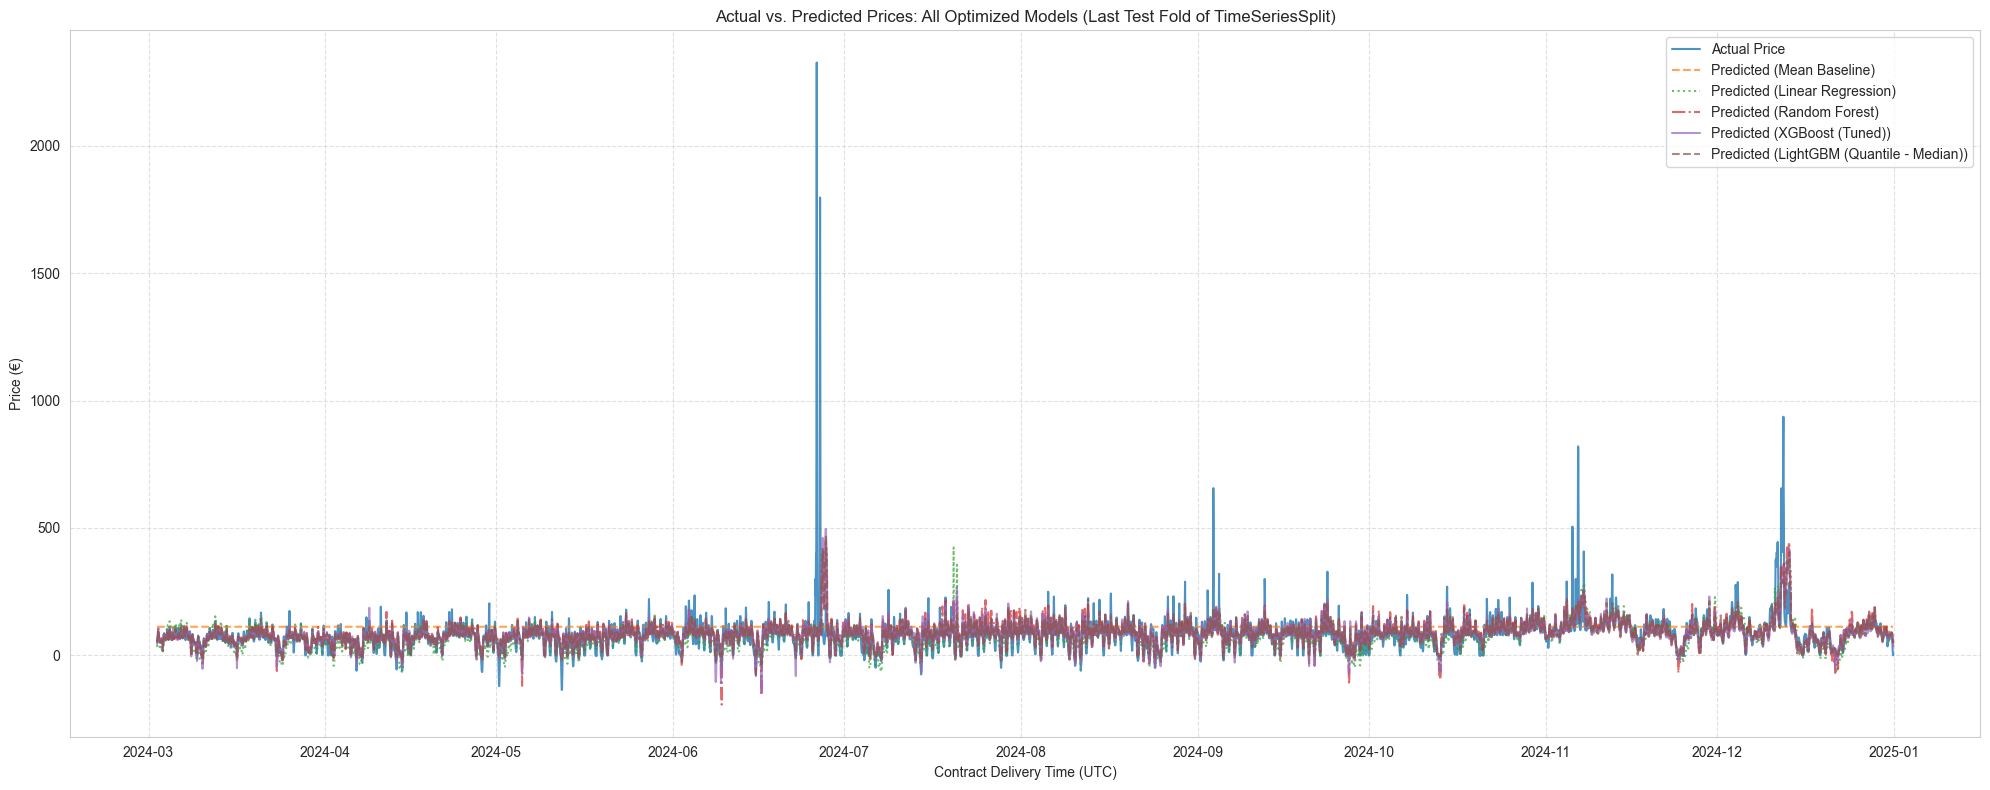

In [69]:
# Visualize Performance Comparison (Using last fold data)

plt.figure(figsize=(20, 8))
plt.plot(contract_delivery_last_fold_optimized, actual_prices_last_fold_optimized, label='Actual Price', alpha=0.8, linewidth=1.5)
# Plot predictions for all models
for model_name, predictions in last_fold_plot_data_optimized.items():
    linestyle = '-' # Default
    if 'Mean Baseline' in model_name: linestyle = '--'
    elif 'Linear Regression' in model_name: linestyle = ':'
    elif 'Random Forest' in model_name: linestyle = '-.'
    elif 'XGBoost' in model_name: linestyle = '-' # Solid line for best model
    elif 'LightGBM' in model_name: linestyle = '--' # Dashed for quantile median
    
    plt.plot(contract_delivery_last_fold_optimized, predictions, label=f'Predicted ({model_name})', linestyle=linestyle, alpha=0.7)

plt.title('Actual vs. Predicted Prices: All Optimized Models (Last Test Fold of TimeSeriesSplit)')
plt.xlabel('Contract Delivery Time (UTC)')
plt.ylabel('Price (€)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

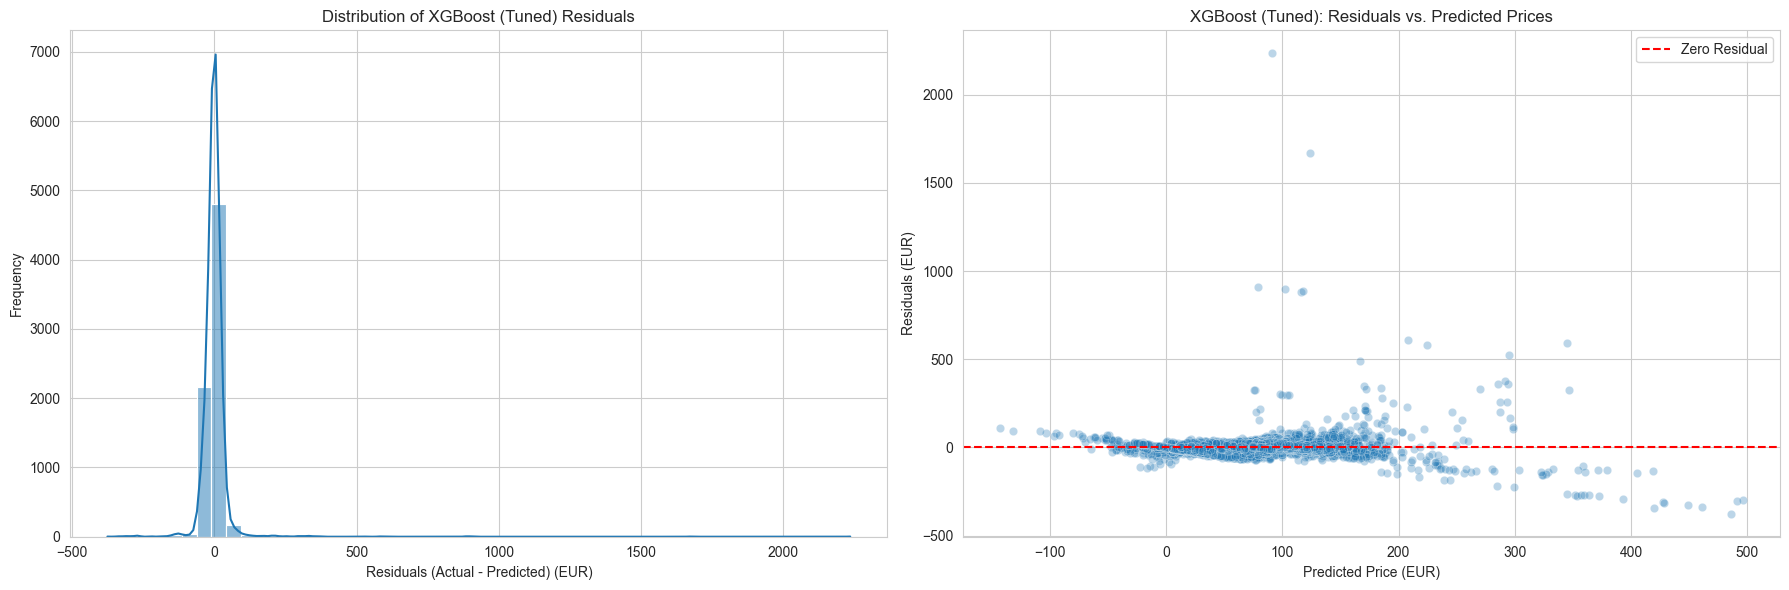

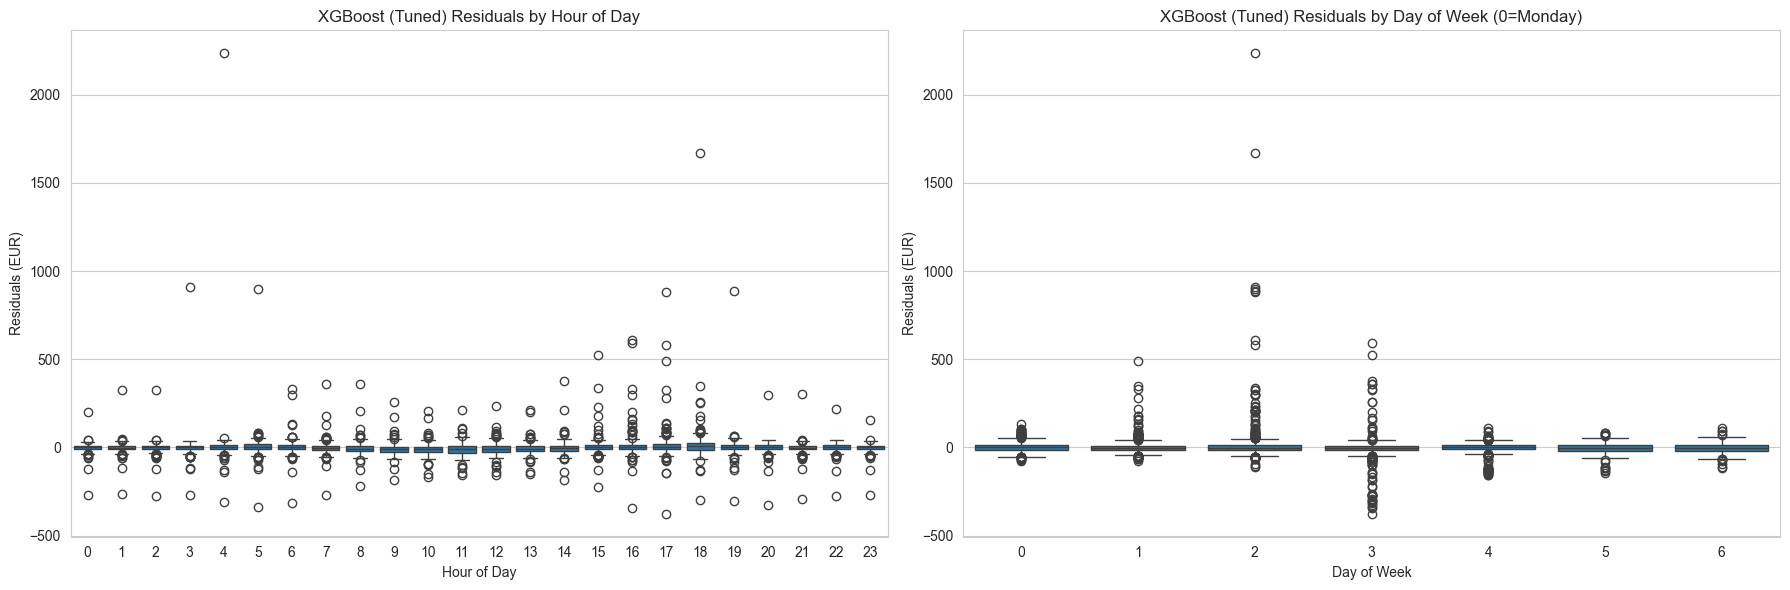

In [70]:
# Detailed Residual Analysis for Best Performing Model (XGBoost Tuned)
if 'XGBoost (Tuned)' in last_fold_plot_data_optimized:
    xgb_opt_residuals = actual_prices_last_fold_optimized - last_fold_plot_data_optimized['XGBoost (Tuned)']
    xgb_opt_predicted_prices = last_fold_plot_data_optimized['XGBoost (Tuned)']

    plt.figure(figsize=(18, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(xgb_opt_residuals, bins=50, kde=True)
    plt.title('Distribution of XGBoost (Tuned) Residuals')
    plt.xlabel('Residuals (Actual - Predicted) (EUR)')
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    sns.scatterplot(x=xgb_opt_predicted_prices, y=xgb_opt_residuals, alpha=0.3)
    plt.axhline(0, color='r', linestyle='--', label='Zero Residual')
    plt.title('XGBoost (Tuned): Residuals vs. Predicted Prices')
    plt.xlabel('Predicted Price (EUR)')
    plt.ylabel('Residuals (EUR)')
    plt.legend()
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(18, 6))
    plt.subplot(1, 2, 1)
    sns.boxplot(x=contract_delivery_last_fold_optimized.dt.hour, y=xgb_opt_residuals)
    plt.title('XGBoost (Tuned) Residuals by Hour of Day')
    plt.xlabel('Hour of Day')
    plt.ylabel('Residuals (EUR)')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=contract_delivery_last_fold_optimized.dt.dayofweek, y=xgb_opt_residuals)
    plt.title('XGBoost (Tuned) Residuals by Day of Week (0=Monday)')
    plt.xlabel('Day of Week')
    plt.ylabel('Residuals (EUR)')
    plt.tight_layout()
    plt.show()
else:
    print("\nXGBoost (Tuned) predictions not available for detailed residual analysis.")

prev_day_avg_price_calc     0.413099
net_demand_forecast         0.116396
price_volatility_24h_lag    0.081856
hour_cos_2                  0.055129
year                        0.053407
renewable_penetration       0.051483
lag_24_price                0.037765
lag_168_price               0.034953
month                       0.030286
day_of_week_cos_1           0.024929
hour_cos_1                  0.024832
weekday                     0.024507
hour_sin_1                  0.013645
temperature_diff            0.007458
day_of_week_sin_1           0.005249
dtype: float32


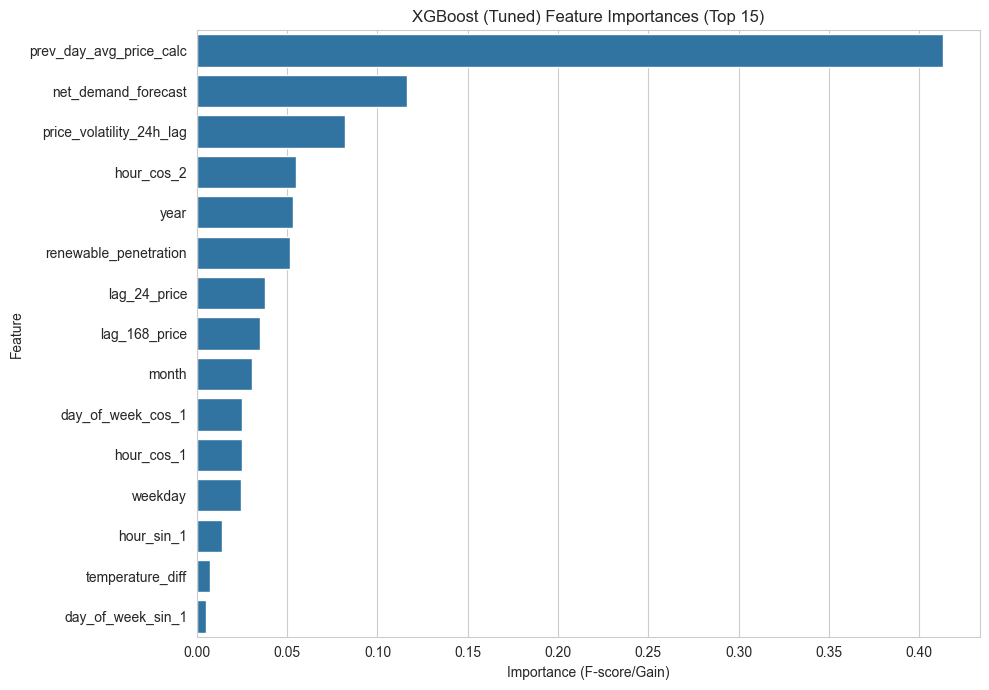

In [71]:
# Feature Importance for XGBoost (Tuned)

if hasattr(best_xgb_model, 'feature_importances_'):
    feature_importances_optimized = pd.Series(best_xgb_model.feature_importances_, index=final_optimized_features)
    feature_importances_optimized = feature_importances_optimized.sort_values(ascending=False)
    print(feature_importances_optimized.head(15))

    plt.figure(figsize=(10, 7))
    sns.barplot(x=feature_importances_optimized.head(15).values, y=feature_importances_optimized.head(15).index)
    plt.title('XGBoost (Tuned) Feature Importances (Top 15)')
    plt.xlabel('Importance (F-score/Gain)')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.show()
else:
    print("\nFeature importances not available for the best XGBoost model.")

SHAP Explainer training on 5000 samples from the training data.


100%|===================| 499/500 [00:39<00:00]        

SHAP values calculated for 500 test samples.

Displaying SHAP Summary Plot (Beeswarm)...


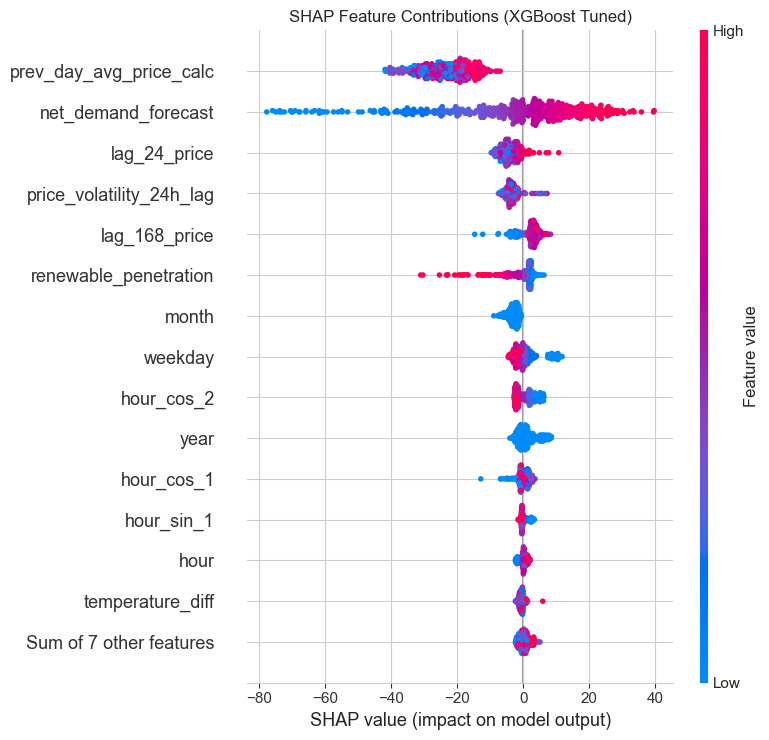

Interpretation: Each dot represents an instance. 
Color shows feature value (red=high, blue=low). 
Position shows impact on prediction.


In [76]:
# SHAP Analysis for XGBoost (Tuned)

if 'XGBoost (Tuned)' in last_fold_plot_data_optimized: 
    # preventing SHAP from crashing on very large datasets
    last_train_index, last_test_index_for_shap = list(tscv_refined.split(X_optimized))[-1]
    X_train_last_fold = X_optimized.iloc[last_train_index]

    X_train_sampled_shap = X_train_last_fold.sample(n=min(5000, len(X_train_last_fold)), random_state=42)
    print(f"SHAP Explainer training on {len(X_train_sampled_shap)} samples from the training data.")

    explainer = shap.TreeExplainer(best_xgb_model, X_train_sampled_shap)

    # Calculating SHAP values for first 500 samples
    X_test_last_fold_shap = X_optimized.iloc[last_test_index_for_shap] # correct last_test_index
    X_test_sampled_shap = X_test_last_fold_shap.head(500).copy() 

    raw_shap_values = explainer.shap_values(X_test_sampled_shap)
    print(f"SHAP values calculated for {len(X_test_sampled_shap)} test samples.")

    # creating a shap.Explanation object
    if isinstance(raw_shap_values, list): # For multi-output models
        shap_values_for_plot = shap.Explanation(raw_shap_values[0], data=X_test_sampled_shap.values, feature_names=X_test_sampled_shap.columns)
    elif not isinstance(raw_shap_values, shap.Explanation):
        shap_values_for_plot = shap.Explanation(raw_shap_values, data=X_test_sampled_shap.values, feature_names=X_test_sampled_shap.columns)
    else:
        shap_values_for_plot = raw_shap_values

    # Summary Plot (Beeswarm Plot)
    print("\nDisplaying SHAP Summary Plot (Beeswarm)...")
    shap.plots.beeswarm(shap_values_for_plot, max_display=15, show=False)
    plt.title("SHAP Feature Contributions (XGBoost Tuned)")
    plt.tight_layout()
    plt.show()
    print("Interpretation: Each dot represents an instance. \nColor shows feature value (red=high, blue=low). \nPosition shows impact on prediction.")
else:
    print("\nSHAP analysis skipped as XGBoost (Tuned) model predictions not available for last fold.")

  Training LightGBM for Quantile: 10th percentile...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005457 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2448
[LightGBM] [Info] Number of data points in the train set: 36516, number of used features: 21
[LightGBM] [Info] Start training from score 20.625000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Lig

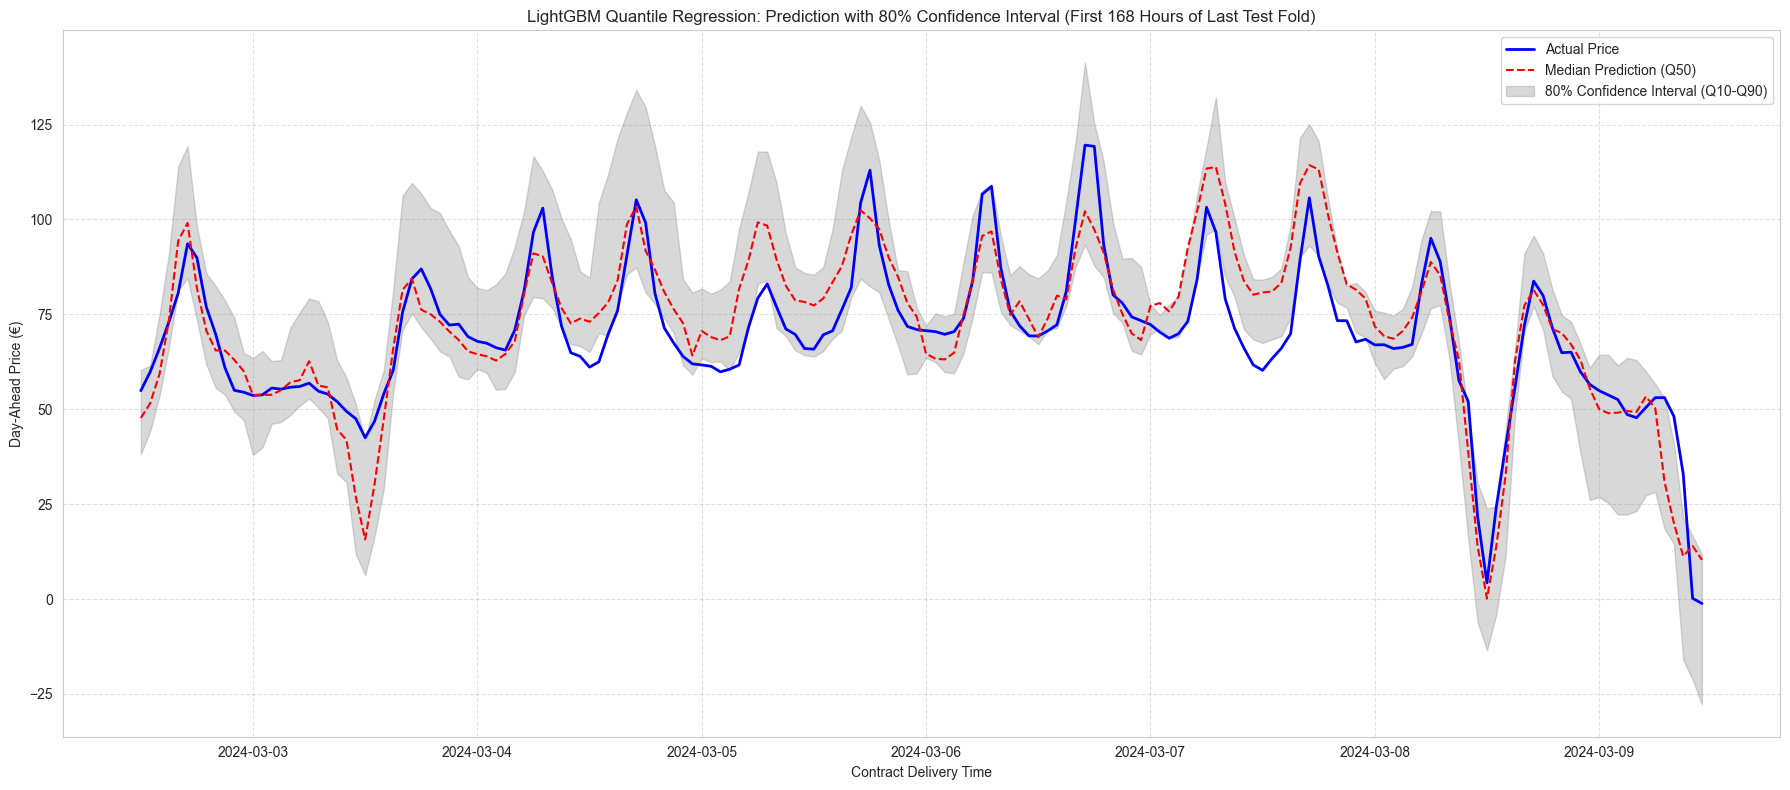

In [77]:
# Quantile Forecasting Visualization (LightGBM)

# Defining specific quantiles for which we want to train models and get predictions.
QUANTILES_FOR_PLOT = [0.10, 0.50, 0.90]
quantile_models_plot = {}
quantile_predictions_plot = {}

# only runs if necessary training and test data from the last fold are available.
# are defined from the TSCV loop
if last_train_index is not None and last_test_index is not None:
    X_train_last_fold_quantile = X_optimized.iloc[last_train_index]
    y_train_last_fold_quantile = y_optimized.iloc[last_train_index]
    X_test_last_fold_quantile = X_optimized.iloc[last_test_index] # last_test_index for consistency

    for q in QUANTILES_FOR_PLOT:
        print(f"  Training LightGBM for Quantile: {q*100:.0f}th percentile...")
        lgb_q_model = lgb.LGBMRegressor(objective='quantile', alpha=q, random_state=42, 
                                        n_estimators=best_xgb_params.get('n_estimators', 1000), 
                                        learning_rate=best_xgb_params.get('learning_rate', 0.05), 
                                        max_depth=best_xgb_params.get('max_depth', 7), 
                                        num_leaves=best_xgb_params.get('num_leaves', 63), 
                                        n_jobs=-1)
        lgb_q_model.fit(X_train_last_fold_quantile, y_train_last_fold_quantile)
        quantile_models_plot[q] = lgb_q_model
        quantile_predictions_plot[q] = lgb_q_model.predict(X_test_last_fold_quantile)

    # predictions for plotting
    pred_lower_bound_plot = quantile_predictions_plot[0.10]
    pred_median_plot = quantile_predictions_plot[0.50]
    pred_upper_bound_plot = quantile_predictions_plot[0.90]

    # Using same actuals and contract_delivery from the last test fold
    plot_actuals = y_optimized.iloc[last_test_index] 
    plot_delivery_time = df_optimized.iloc[last_test_index]['contract-delivery'] # Get delivery times

    # Plotting only a subset of the test data for clarity (e.g., first 7 days = 168 hours)
    plot_range_hours = 24 * 7 # Plot 7 days
    plot_slice_end = min(plot_range_hours, len(plot_actuals))

    plt.figure(figsize=(18, 8))
    plt.plot(plot_delivery_time.iloc[:plot_slice_end],
            plot_actuals.iloc[:plot_slice_end].values,
            label="Actual Price", color='blue', linewidth=2)
    plt.plot(plot_delivery_time.iloc[:plot_slice_end],
            pred_median_plot[:plot_slice_end],
            label="Median Prediction (Q50)", color='red', linestyle='--', linewidth=1.5)
    plt.fill_between(plot_delivery_time.iloc[:plot_slice_end],
                    pred_lower_bound_plot[:plot_slice_end],
                    pred_upper_bound_plot[:plot_slice_end],
                    color='gray', alpha=0.3, label="80% Confidence Interval (Q10-Q90)")
    plt.title(f"LightGBM Quantile Regression: Prediction with 80% Confidence Interval (First {plot_range_hours} Hours of Last Test Fold)")
    plt.xlabel("Contract Delivery Time")
    plt.ylabel("Day-Ahead Price (€)")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()
else:
    print("\nQuantile forecasting visualization skipped as last fold data (last_train_index/last_test_index) not fully available.")